In [1]:
# import mplhep
import sys

import numpy as np
import pandas as pd
import uproot
from matplotlib import pyplot as plt

In [2]:
plt.rcParams.update({
    "axes.labelsize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 16,
    "figure.titlesize": 20
})

In [3]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200000)

In [4]:
sys.path.append("/home/belle2/amubarak/Ds2D0enue_Analysis/07-Python_Functions/")

# Prep-Work

### Import Data

Correct Charge

In [5]:
import os
import pandas as pd
import uproot
from tqdm import tqdm

# === Load only selected branches ===
with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/Save_var.txt") as f:
    variables_to_load = [
        line.strip().strip(",").strip('"').strip("'")
        for line in f
        if line.strip() and not line.strip().startswith("#")
    ]

samples = ["Signal", "BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
GenEvents = ["Signal","BB","ccbar","ddbar","ssbar","taupair","uubar"]
Date = "0530"
Attempt = "0"

DataFrames = {}

# === Load each sample one by one with progress bar ===
for name in tqdm(samples, desc="Loading samples"):
    if name == "Signal":
        path = "/home/belle2/amubarak/C01-Simulated_Events/Ds2D0enu-Signal.root:Dstree"
    else:
        path = f"/group/belle/users/amubarak/02-Grid/Sample_Grid/Ds2D0e-Generic_Ds_{Date}25_{Attempt}_{name}.root:Dstree"

    try:
        df = uproot.concatenate(path, filter_name=variables_to_load, library='pd')
        print(f"✔️ Loaded {name} with {len(df):,} entries")
        DataFrames[name] = df
    except Exception as e:
        print(f"❌ Failed to load {name}: {e}")
        DataFrames[name] = pd.DataFrame()

# === Merge background categories ===
background_samples = ["BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
DataFrames["All"] = pd.concat([DataFrames[s] for s in background_samples], ignore_index=True)

# === Combine uds light-quark backgrounds ===
DataFrames["uds"] = pd.concat(
    [DataFrames["uubar"], DataFrames["ddbar"], DataFrames["ssbar"]],
    ignore_index=True
)

Loading samples:  14%|█▍        | 1/7 [00:14<01:29, 14.84s/it]

✔️ Loaded Signal with 226,152 entries


Loading samples:  29%|██▊       | 2/7 [00:25<01:01, 12.36s/it]

✔️ Loaded BB with 22,121 entries


Loading samples:  43%|████▎     | 3/7 [04:23<07:40, 115.20s/it]

✔️ Loaded ccbar with 1,802,245 entries


Loading samples:  57%|█████▋    | 4/7 [04:30<03:37, 72.55s/it] 

✔️ Loaded ddbar with 35,557 entries


Loading samples:  71%|███████▏  | 5/7 [04:42<01:41, 50.75s/it]

✔️ Loaded ssbar with 69,533 entries


Loading samples:  86%|████████▌ | 6/7 [04:44<00:34, 34.20s/it]

✔️ Loaded taupair with 2,707 entries


Loading samples: 100%|██████████| 7/7 [05:21<00:00, 46.00s/it]

✔️ Loaded uubar with 158,960 entries


In [6]:
# import os
# import uproot
# import pandas as pd
# from tqdm import tqdm

# # === Load only selected branches ===
# with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/Save_var.txt") as f:
#     variables_to_load = [
#         line.strip().strip(",").strip('"').strip("'")
#         for line in f
#         if line.strip() and not line.strip().startswith("#")
#     ]

# # Ensure BDT variable is included
# if "Ds_FakeD0BDT" not in variables_to_load:
#     variables_to_load.append("Ds_FakeD0BDT")

# # Make sure Ds_BkgBDT is included
# if "Ds_BkgBDT" not in variables_to_load:
#     variables_to_load.append("Ds_BkgBDT")

# # === Sample list ===
# samples = ["Signal", "BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
# GenEvents = samples.copy()

# # === Input configuration for BkgBDT ===
# Date = "0530"
# Attempt = "0"
# input_dir = "/group/belle/users/amubarak/03-ML/BkgBDT/"

# # === Load ROOT files into DataFrames ===
# DataFrames = {}

# for s in tqdm(samples, desc="Loading ROOT files"):
#     if s == "Signal":
#         file_path = os.path.join(input_dir, "Ds2D0enu-Signal_withBkgBDT.root")
#     else:
#         file_path = os.path.join(
#             input_dir, f"Ds2D0e-Generic_Ds_{Date}25_{Attempt}_{s}_withBkgBDT.root"
#         )

#     df = uproot.concatenate(
#         f"{file_path}:Dstree",
#         filter_name=variables_to_load,
#         library="pd"
#     )

#     print(f"✔️ Loaded {file_path} with {len(df):,} entries")
#     DataFrames[s] = df

# # === Define combined background ===
# background_samples = ["BB", "ccbar", "ddbar", "ssbar", "taupair", "uubar"]
# DataFrames["All"] = pd.concat([DataFrames[s] for s in background_samples], ignore_index=True)

# # === Combine uds backgrounds for convenience ===
# DataFrames["uds"] = pd.concat(
#     [DataFrames["uubar"], DataFrames["ddbar"], DataFrames["ssbar"]],
#     ignore_index=True
# )

The line below is to look at the available variables.

In [7]:
print(DataFrames.keys())

dict_keys(['Signal', 'BB', 'ccbar', 'ddbar', 'ssbar', 'taupair', 'uubar', 'All', 'uds'])


In [8]:
DataFrames["All"].isna().sum()

__experiment__                                              0
__run__                                                     0
__event__                                                   0
__candidate__                                               0
__ncandidates__                                             0
e_isCurl                                                    0
e_isTruthCurl                                               0
e_angleToClosestInList_e_gen                             3577
e_closestInList_e_gen_mcPDG                              3577
e_closestInList_e_gen_genMotherPDG                       3577
e_closestInList_e_gen_pt                                 3577
e_closestInList_e_gen_px                                 3577
e_closestInList_e_gen_py                                 3577
e_closestInList_e_gen_pz                                 3577
e_closestInList_pi_gen_mcPDG                              177
e_closestInList_pi_gen_genMotherPDG                       177
e_closes

## Setup

In [9]:
# # Vertex Fit Rank
# #--------------------
# for key in DataFrames.keys():
#     DataFrames[key] = DataFrames[key].loc[DataFrames[key]["Ds_chiProb_Ds_rank"] == 1]

# # D^*+ Veto
# #----------------
# cut_low = 0.14541 - (3*0.00039706)
# cut_high = 0.14541 + (3*0.00042495)

# for key in DataFrames.keys():
#     df = DataFrames[key]
#     if "Ds_diff_D0pi" in df.columns:
#         DataFrames[key] = df[
#             (df["Ds_diff_D0pi"] <= cut_low) | (df["Ds_diff_D0pi"] >= cut_high)
#         ]

# Fake D0 Suppression
#------------------------
# DataFrames["Signal"] = DataFrames["Signal"][DataFrames["Signal"]['Ds_extraInfo_FastBDT']>=0.58]
# DataFrames["ccbar"] = DataFrames["ccbar"][DataFrames["ccbar"]['Ds_extraInfo_FastBDT']>=0.58]
# DataFrames["All"] = DataFrames["All"][DataFrames["All"]['Ds_extraInfo_FastBDT']>=0.58]

# Peaking Background Removal
#----------------------------
# DataFrames["ccbar"] = DataFrames["ccbar"][(DataFrames["ccbar"]['Ds_diff_D0pi']>=0.15)]
# DataFrames["Signal"] = DataFrames["Signal"][(DataFrames["Signal"]['Ds_diff_D0pi']>=0.15)]

# Photon Conversion
#-------------------
for key in DataFrames.keys():
    df = DataFrames[key]
    if "Ds_gammaveto_M_Correction" in df.columns:
        DataFrames[key] = df[
            (df["Ds_gammaveto_M_Correction"] >= 0.1)
        ]

# # Vertex Fitting
# #----------------
# DataFrames["Signal"] = DataFrames["Signal"][DataFrames["Signal"]['Ds_chiProb']>=0.01]
# DataFrames["ccbar"] = DataFrames["ccbar"][DataFrames["ccbar"]['Ds_chiProb']>=0.01]

# Vertex Fit
#----------------
for key in DataFrames.keys():
    df = DataFrames[key]
    if "Ds_chiProb_Ds_rank" in df.columns:
        DataFrames[key] = df[
            (df['Ds_chiProb_Ds_rank'] == 1)
        ]
        
# KaonID
#-----------------
# DataFrames["Signal"] = DataFrames["Signal"][DataFrames["Signal"]['K_kaonID']>=0.5]
# DataFrames["All"] = DataFrames["All"][DataFrames["All"]['K_kaonID']>=0.5]

# Variable Loop

In [10]:
print(abs(DataFrames["Signal"]['Ds_gammaveto_em_mcPDG']).value_counts(normalize=True,dropna=False).apply(lambda x: f"{x:.6f}"))
print(abs(DataFrames["All"]['Ds_gammaveto_em_mcPDG']).value_counts(normalize=True,dropna=False).apply(lambda x: f"{x:.6f}"))

Ds_gammaveto_em_mcPDG
2.110000e+02    0.564174
3.210000e+02    0.217049
1.100000e+01    0.086879
NaN             0.075607
1.300000e+01    0.041503
2.212000e+03    0.014594
1.000010e+09    0.000146
3.112000e+03    0.000023
3.312000e+03    0.000018
3.222000e+03    0.000006
Name: proportion, dtype: object
Ds_gammaveto_em_mcPDG
2.110000e+02    0.744139
1.100000e+01    0.078882
NaN             0.077924
3.210000e+02    0.039075
1.300000e+01    0.038205
2.212000e+03    0.021593
1.000010e+09    0.000152
3.112000e+03    0.000018
3.222000e+03    0.000008
3.312000e+03    0.000004
Name: proportion, dtype: object


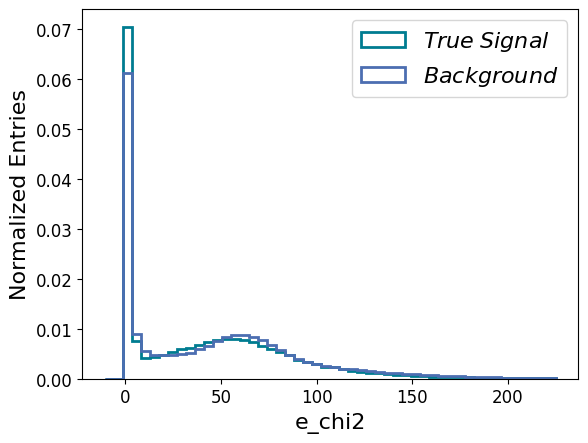

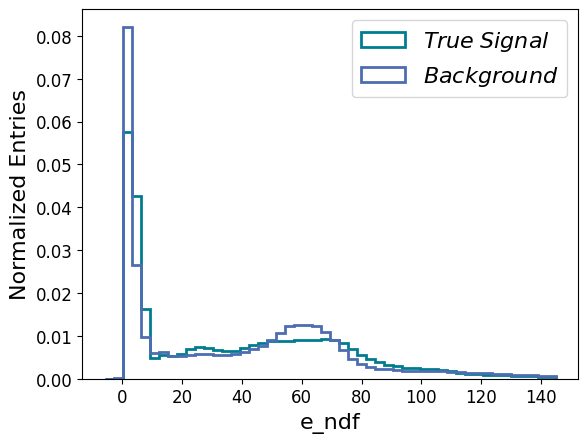

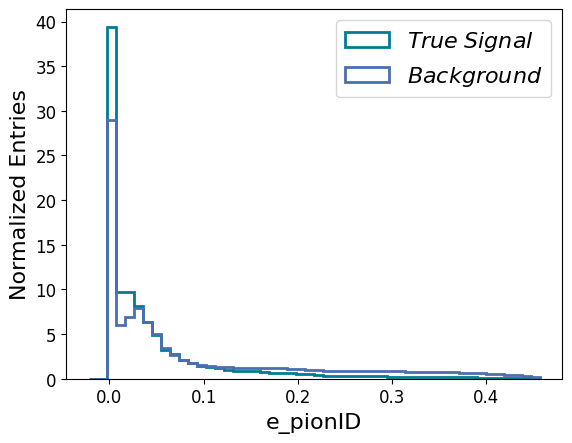

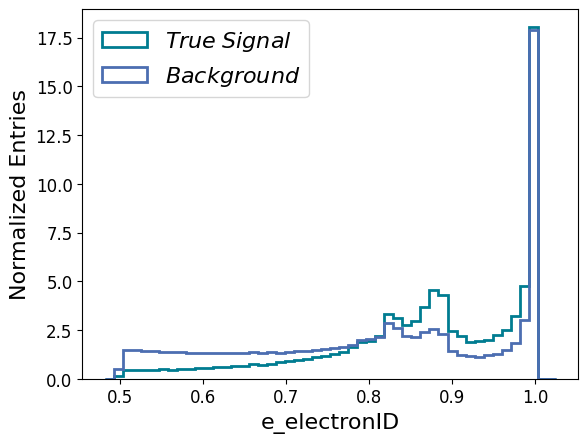

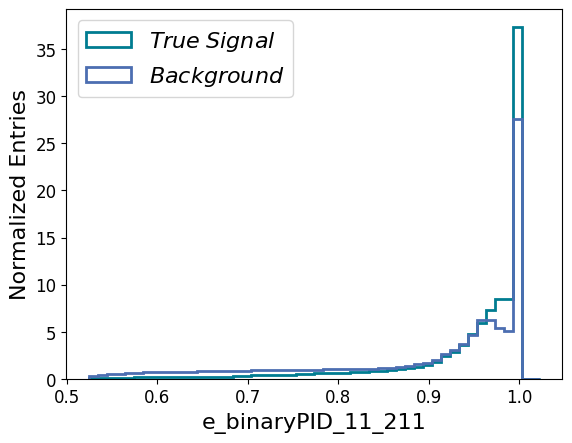

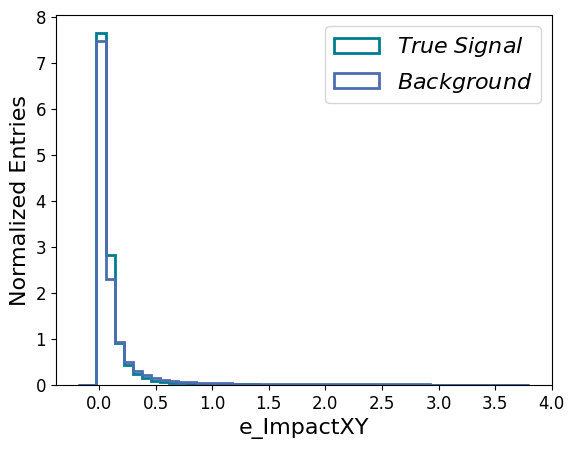

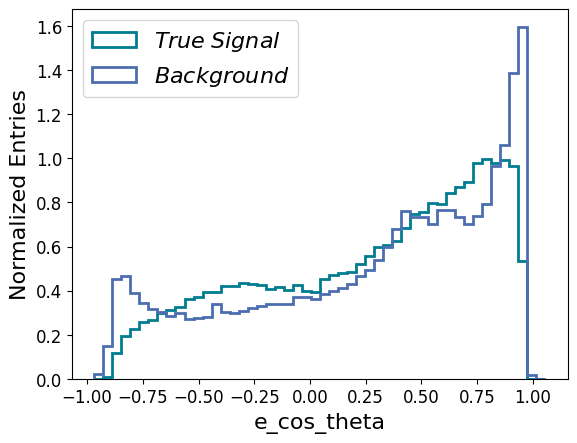

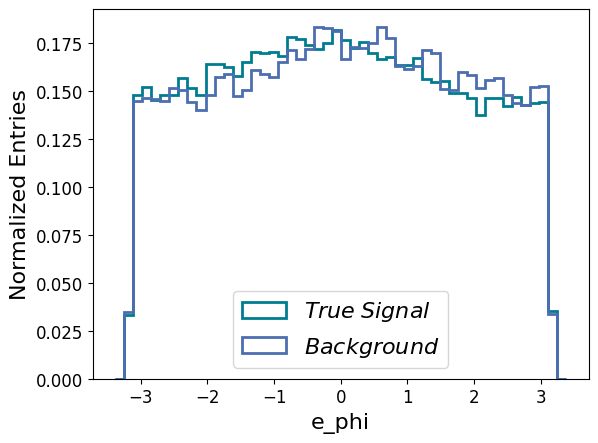

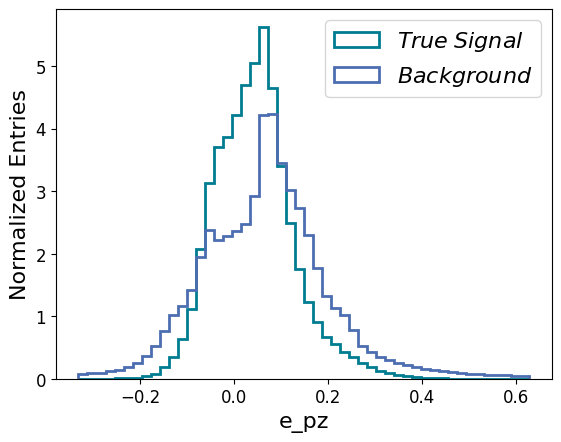

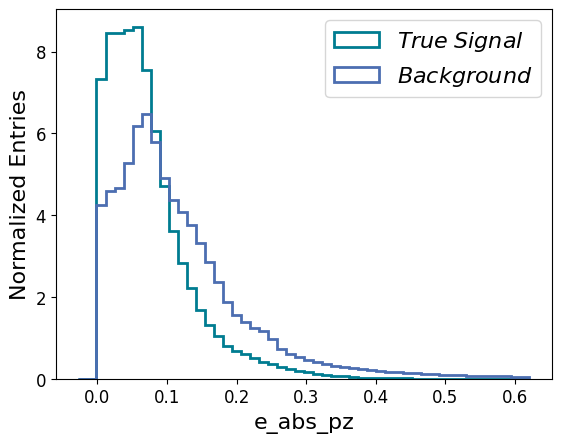

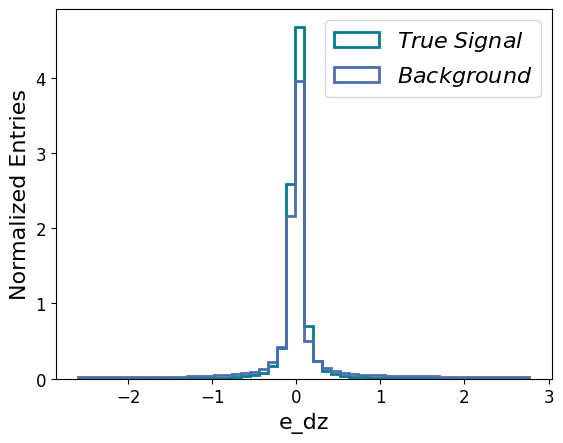

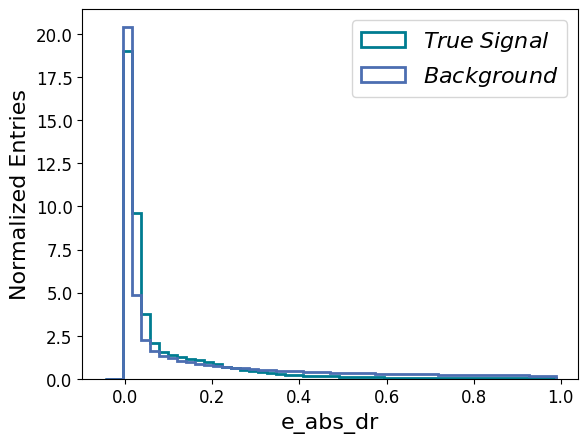

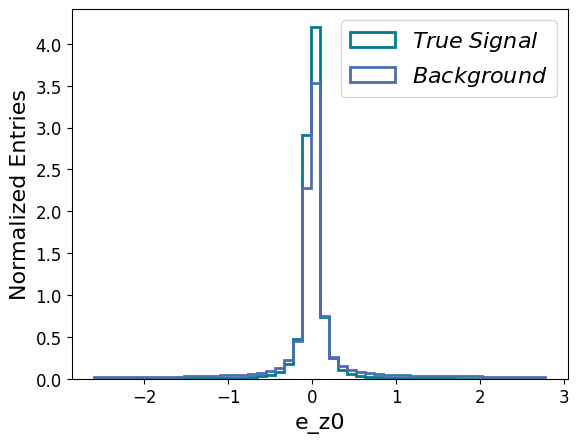

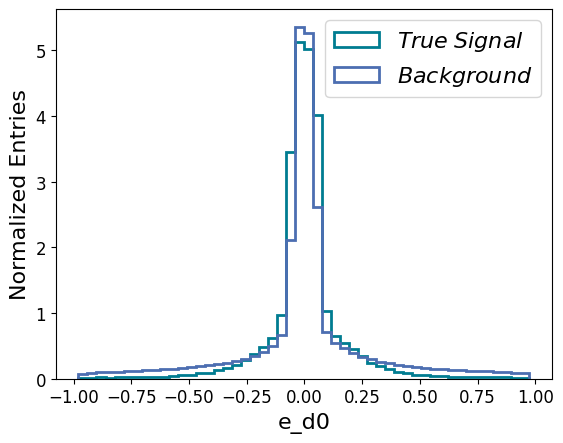

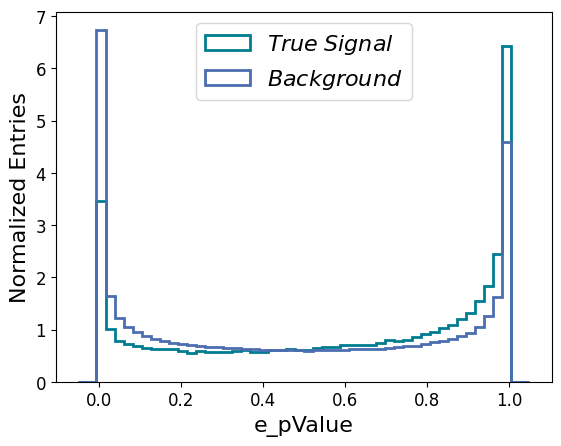

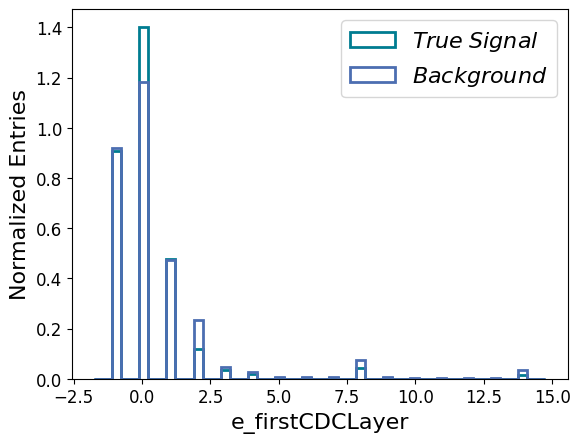

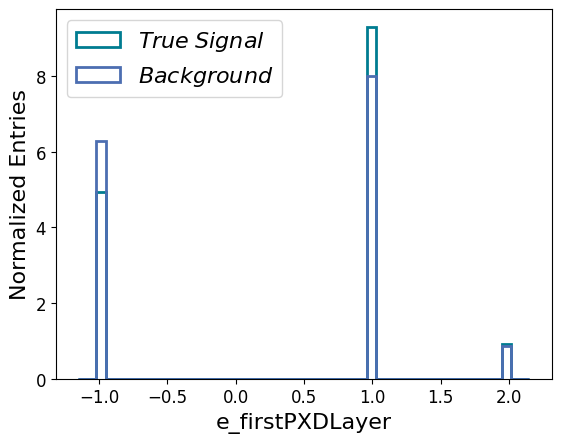

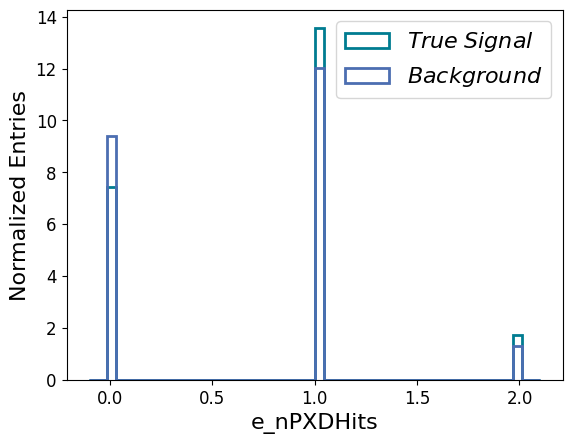

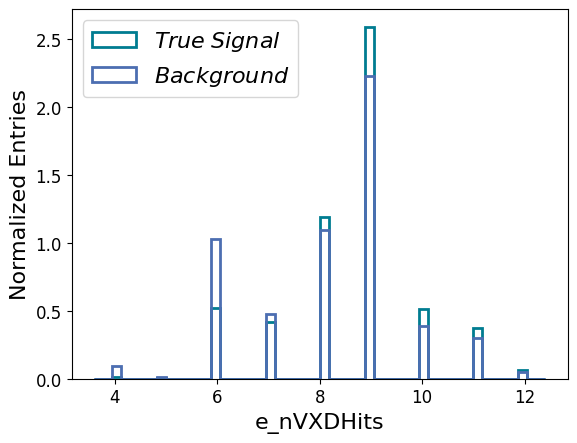

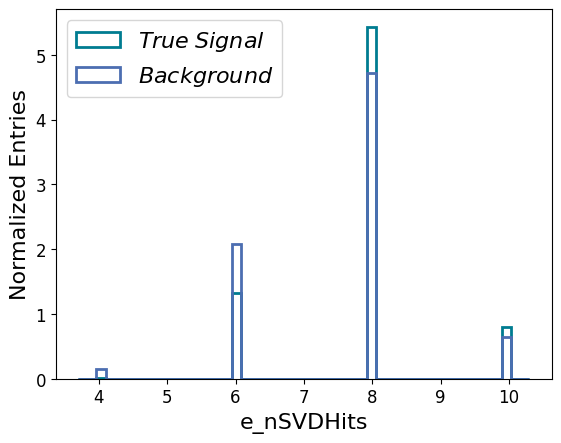

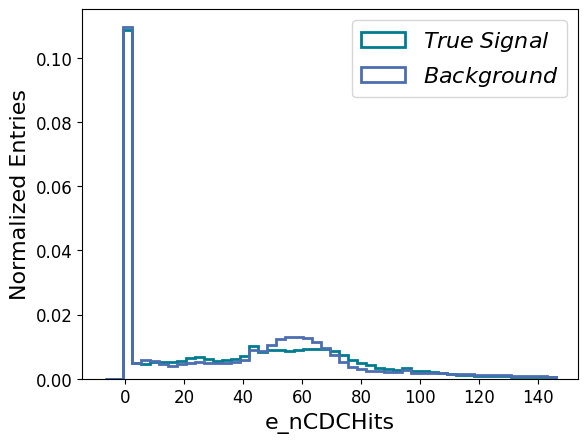

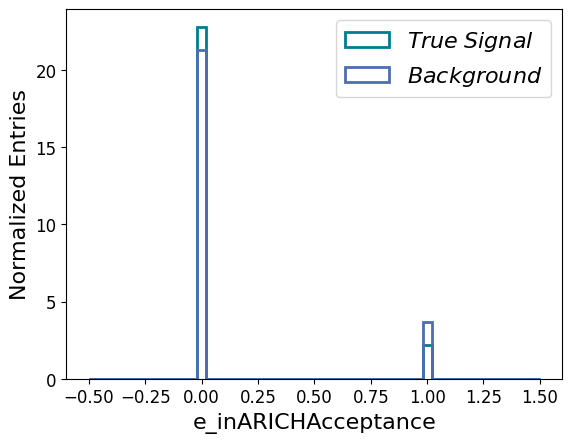

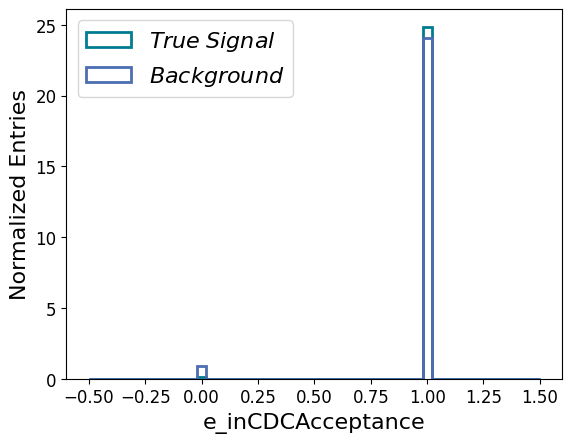

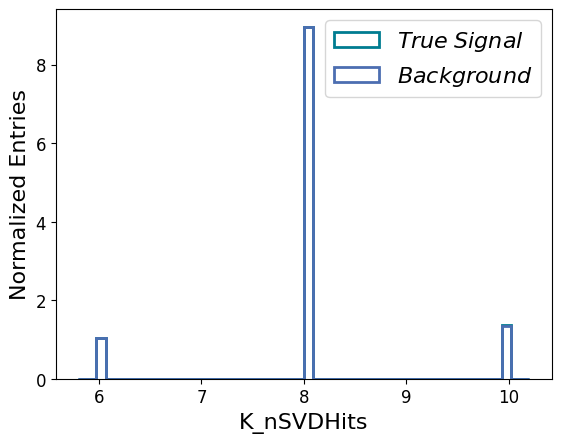

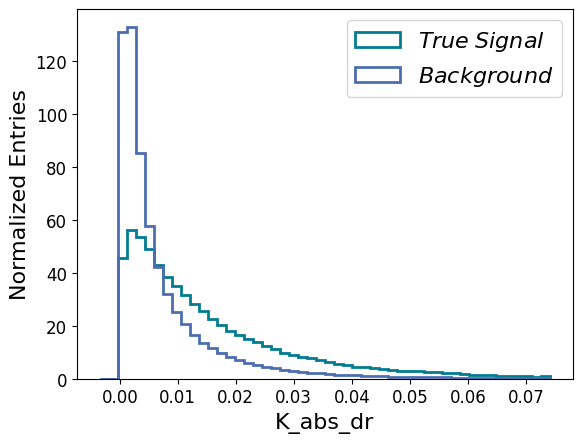

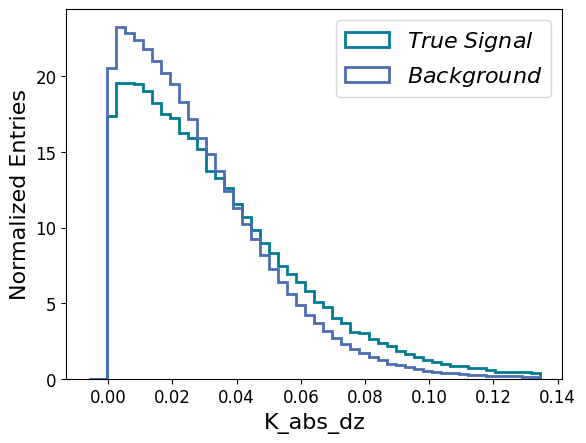

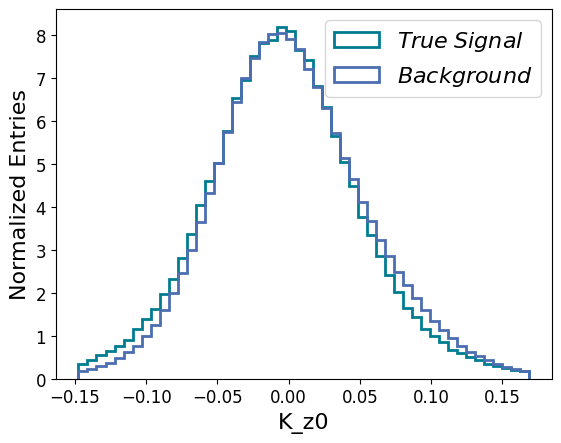

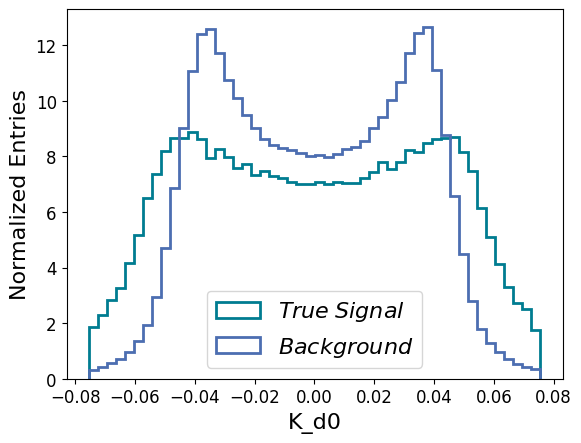

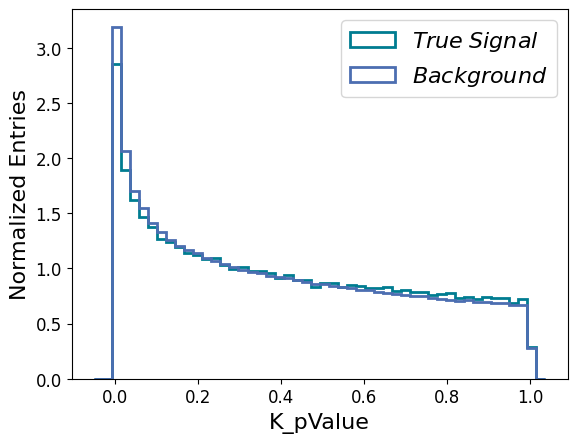

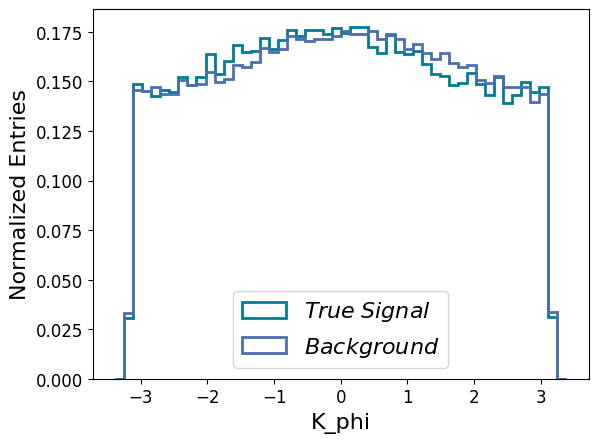

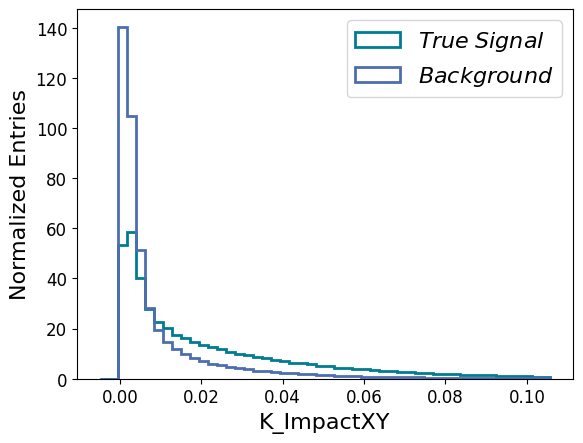

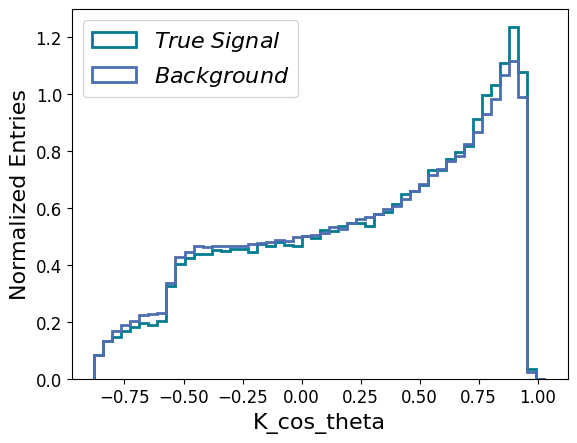

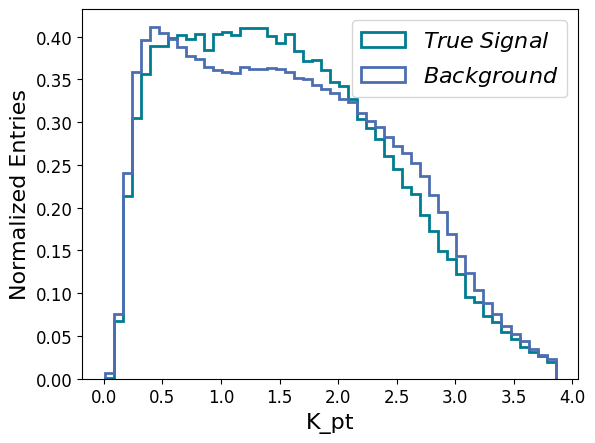

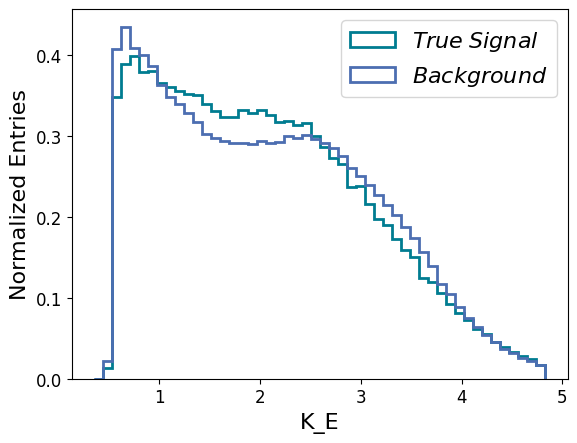

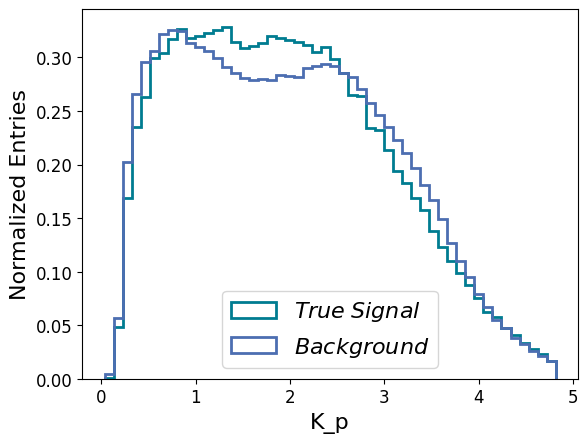

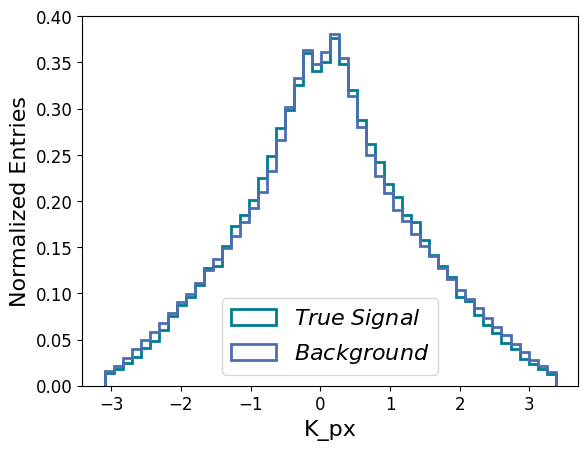

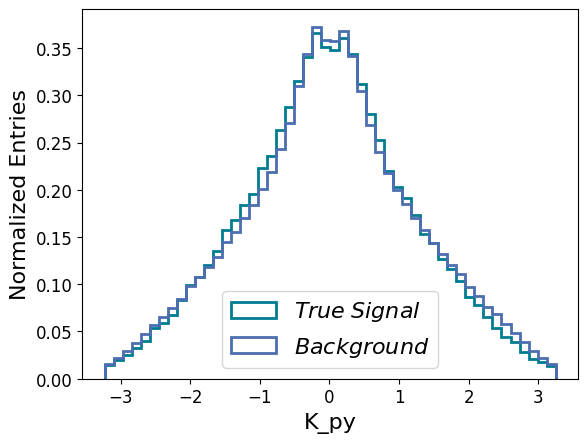

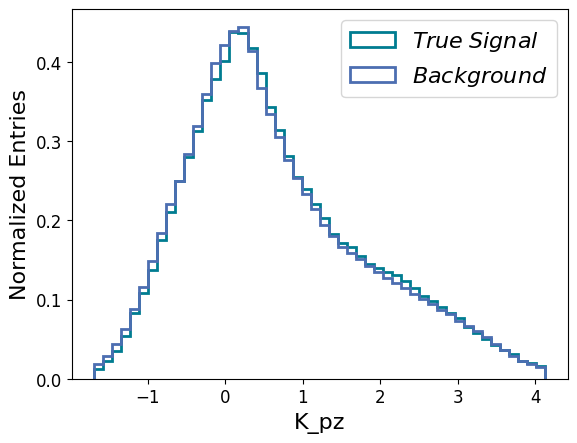

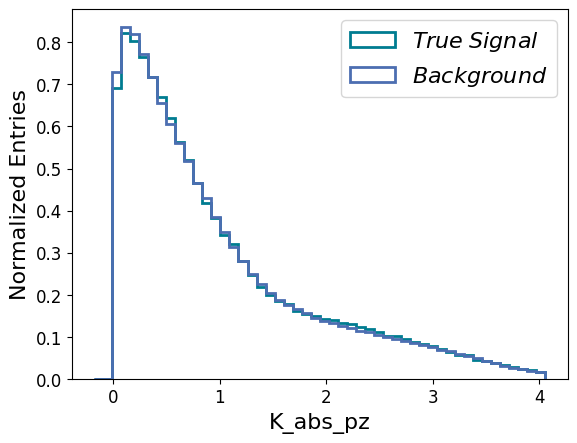

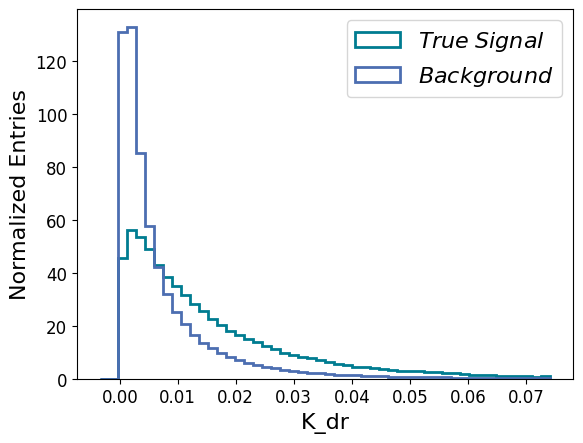

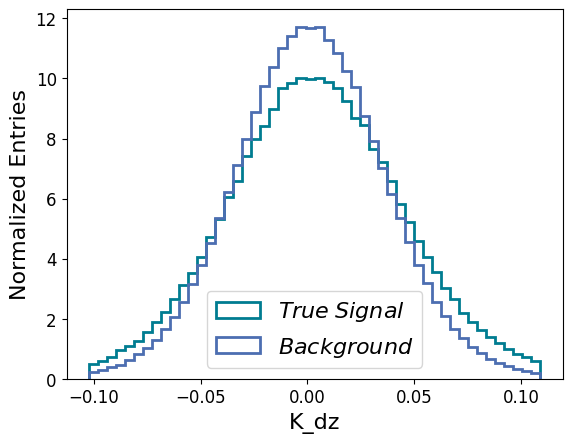

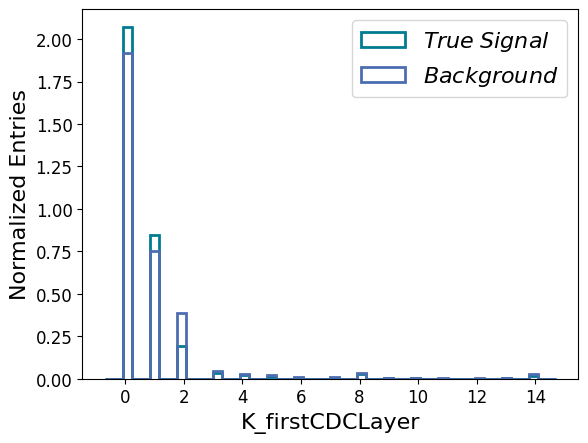

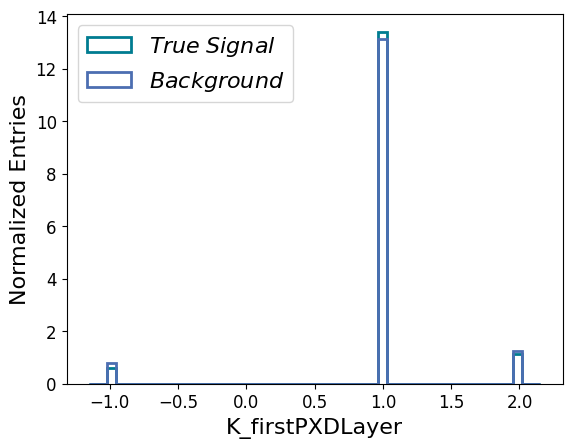

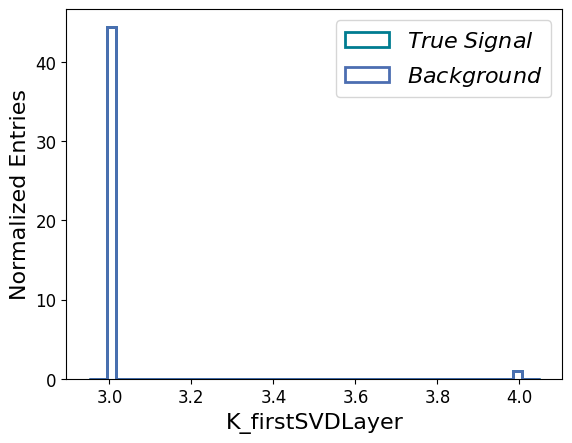

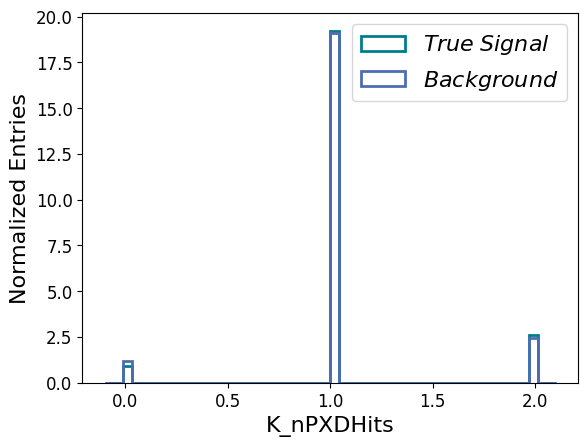

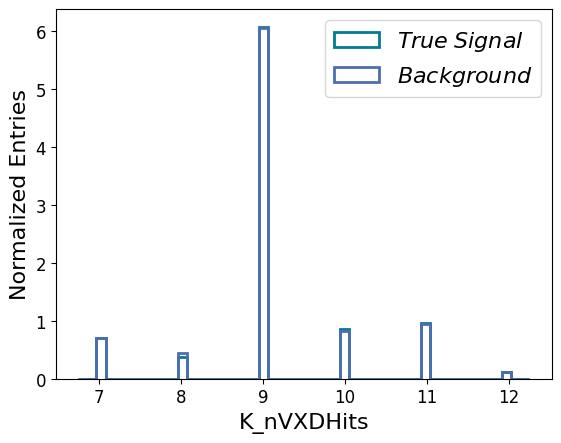

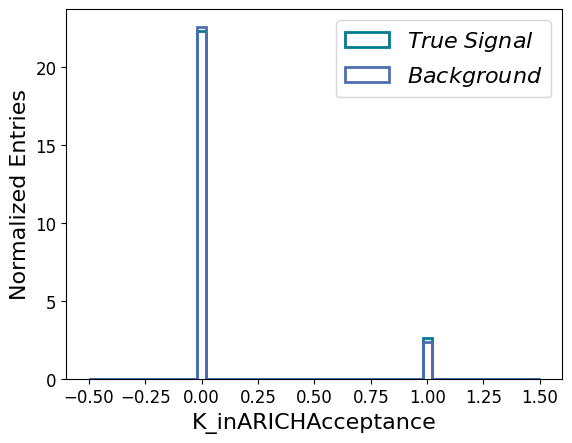

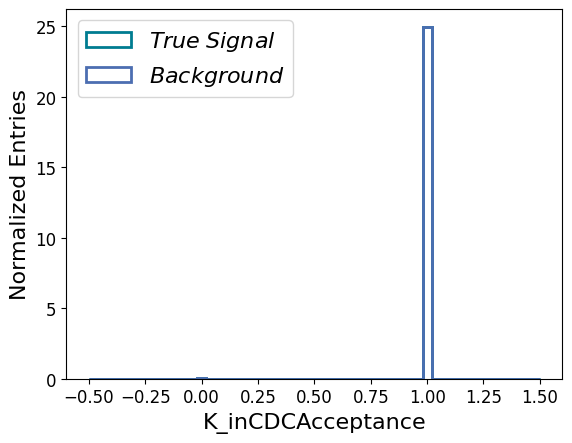

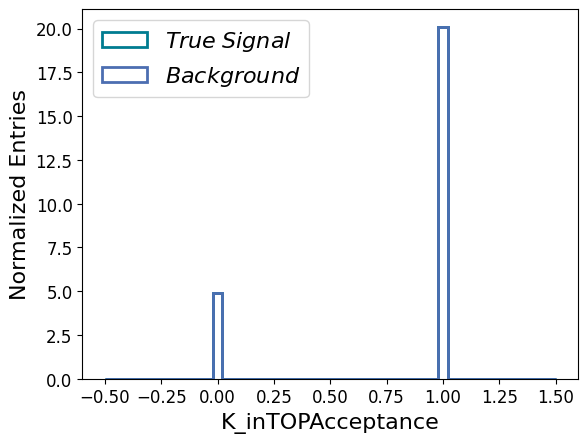

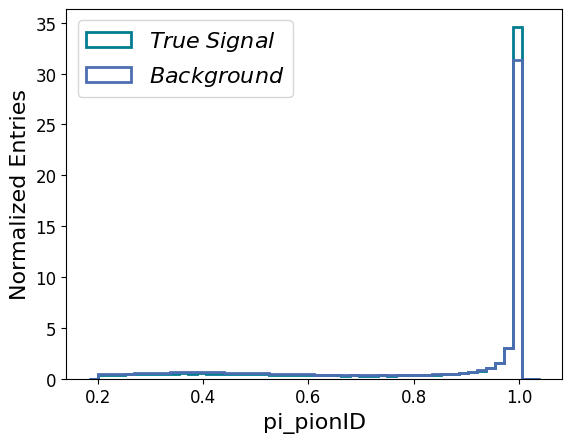

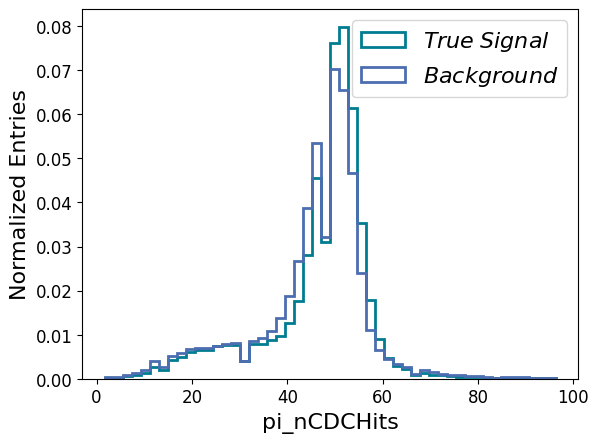

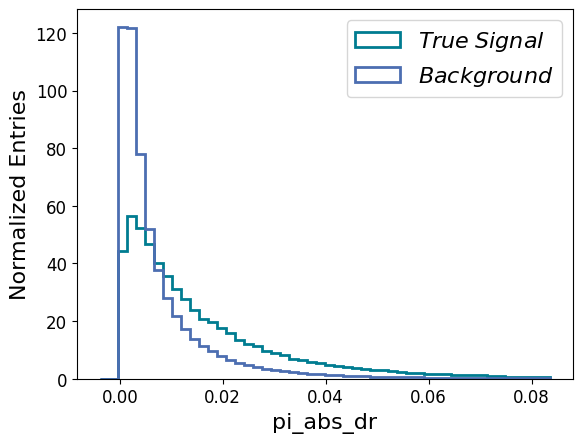

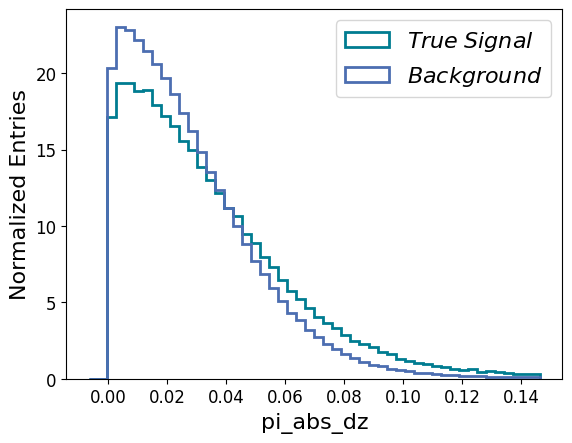

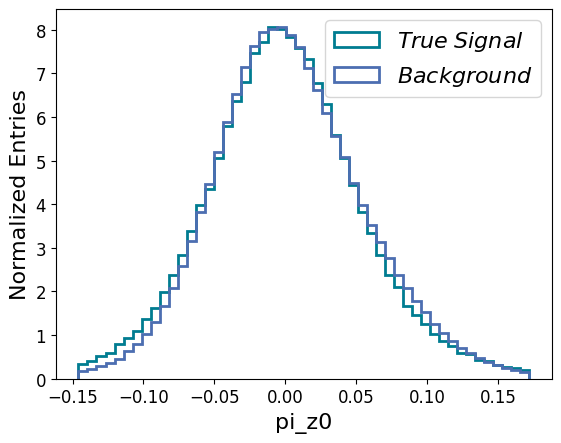

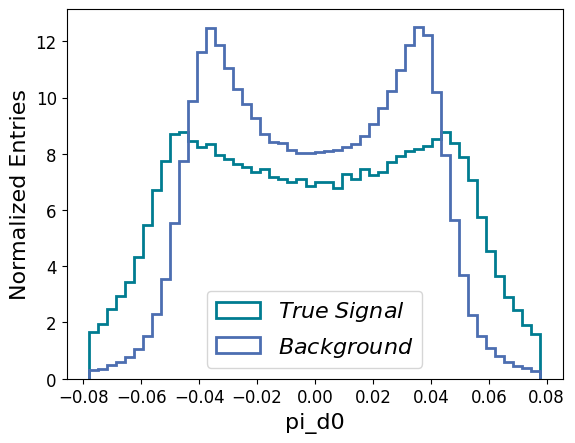

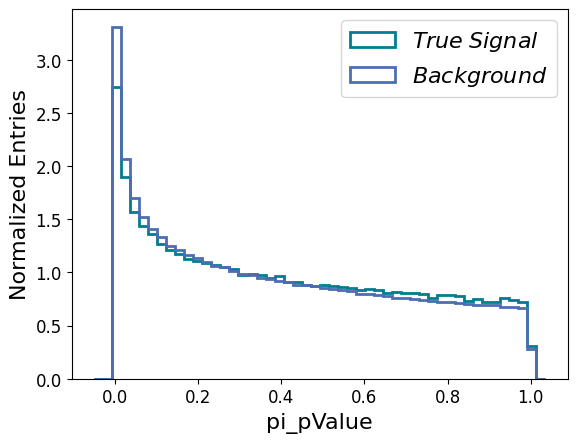

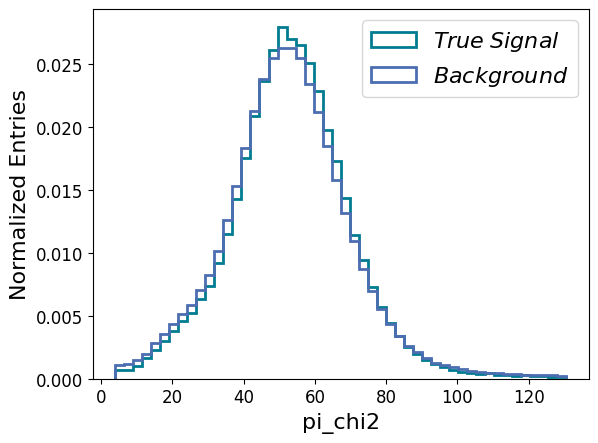

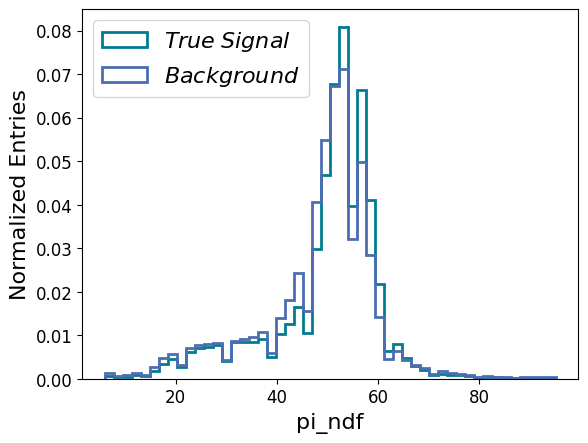

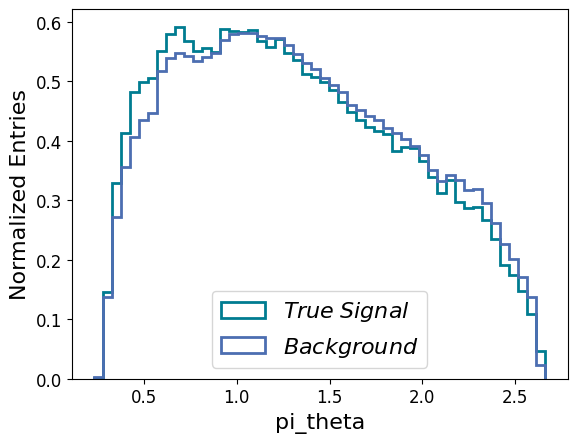

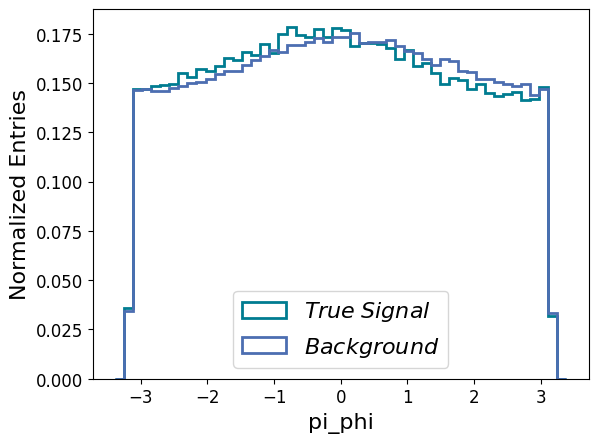

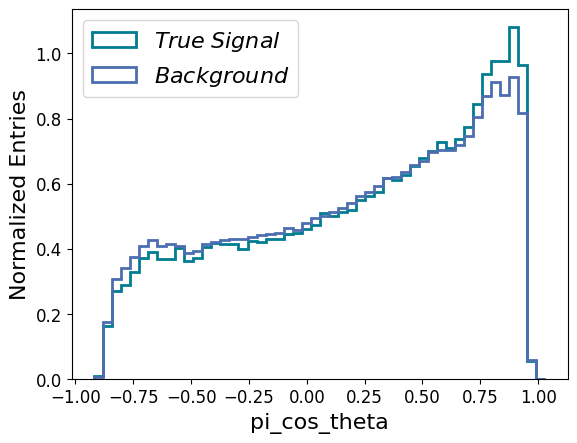

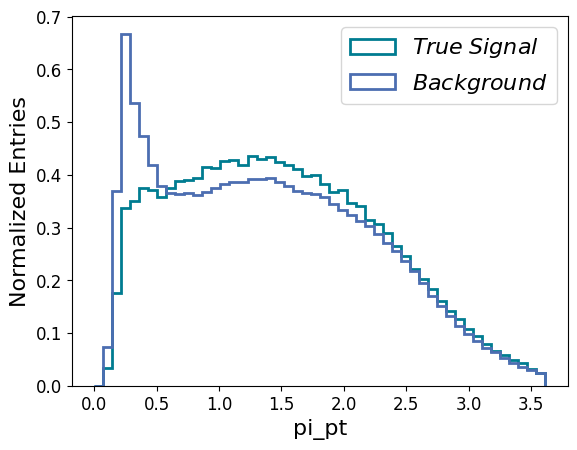

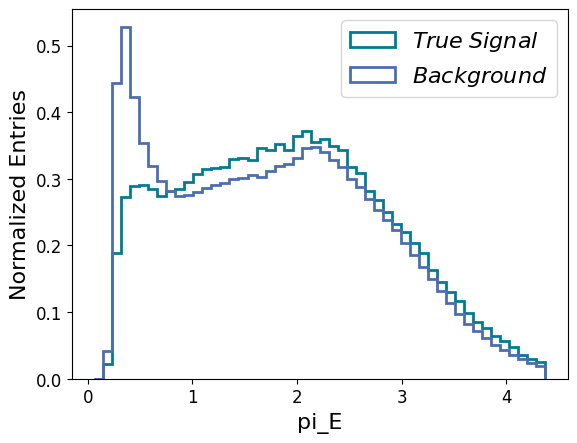

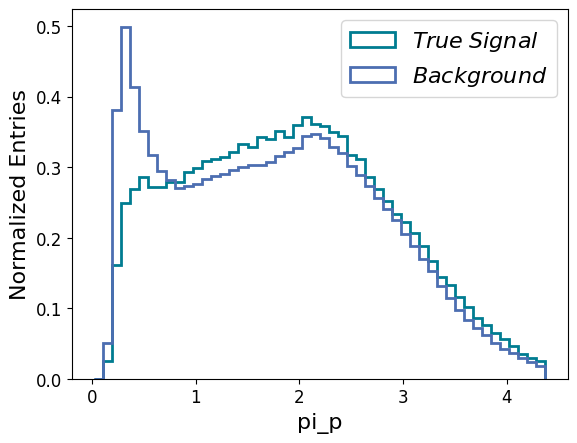

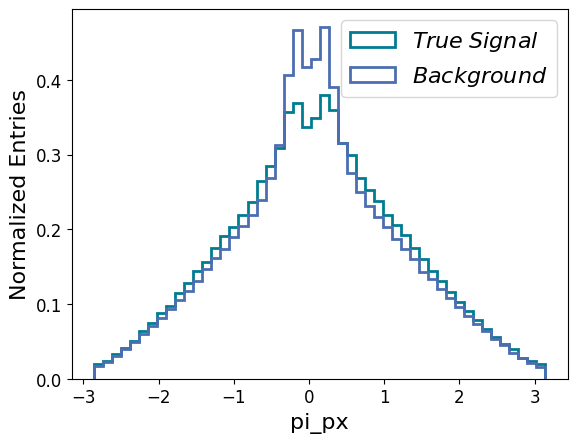

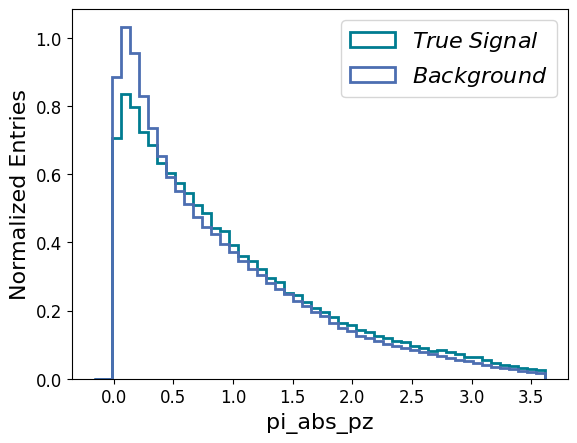

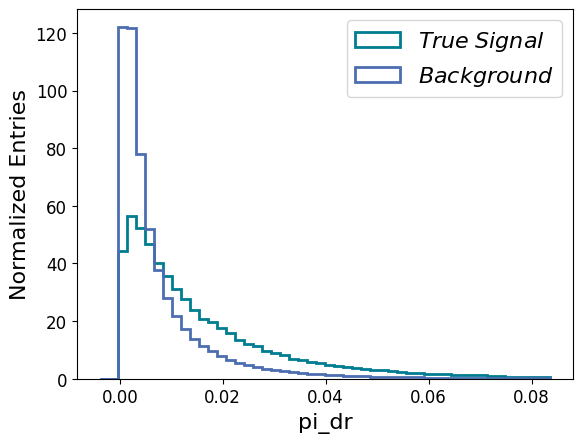

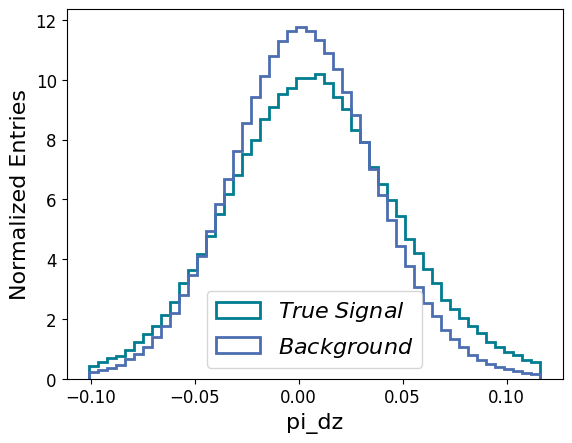

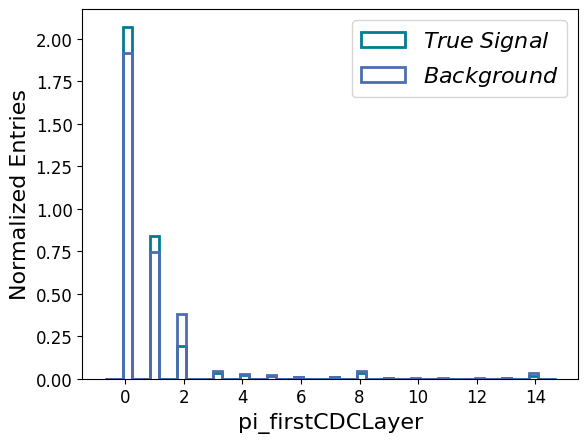

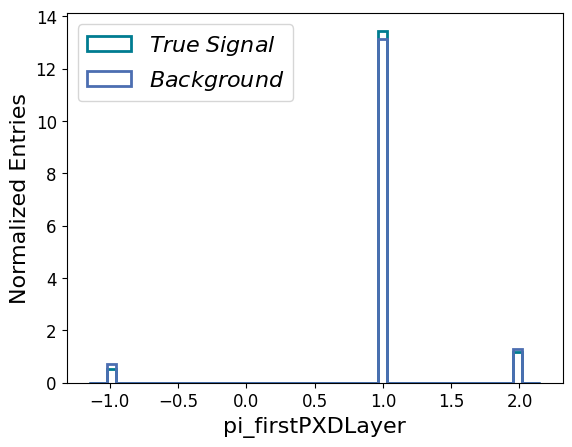

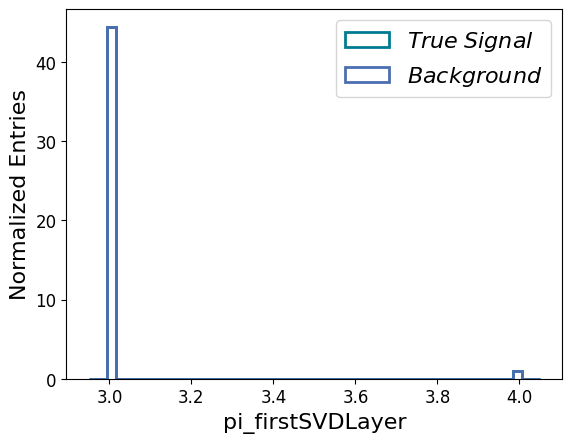

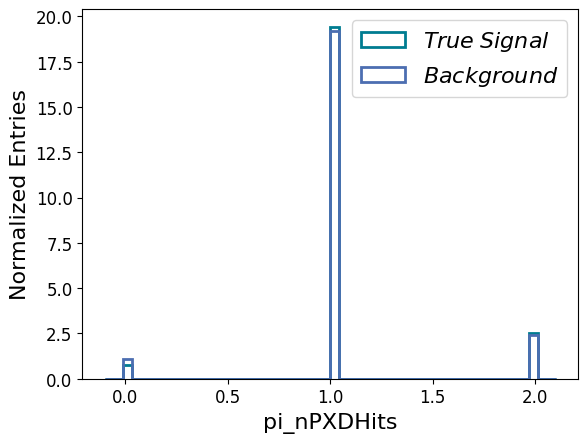

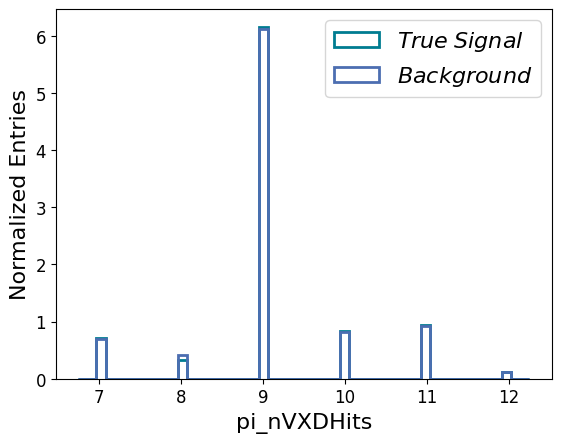

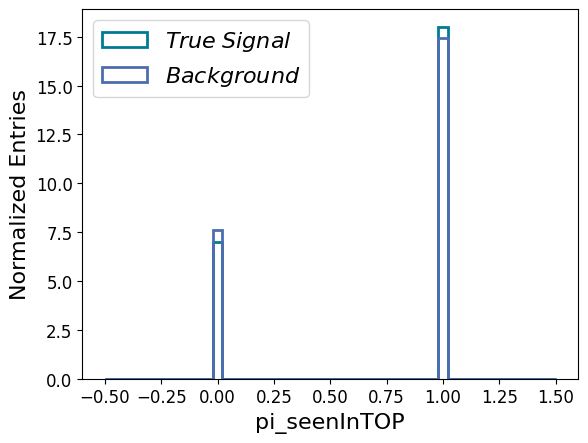

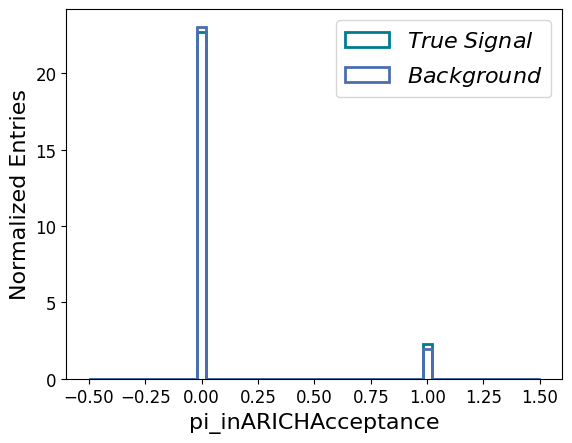

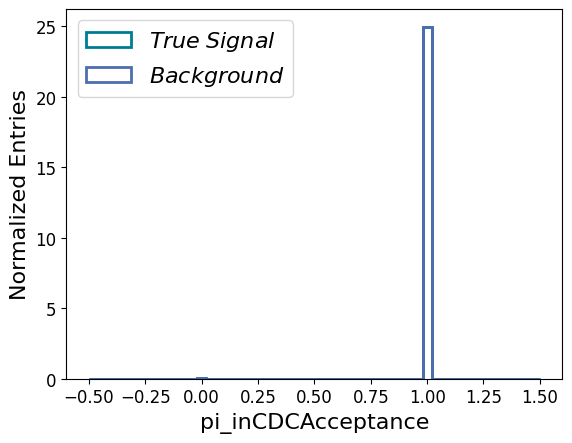

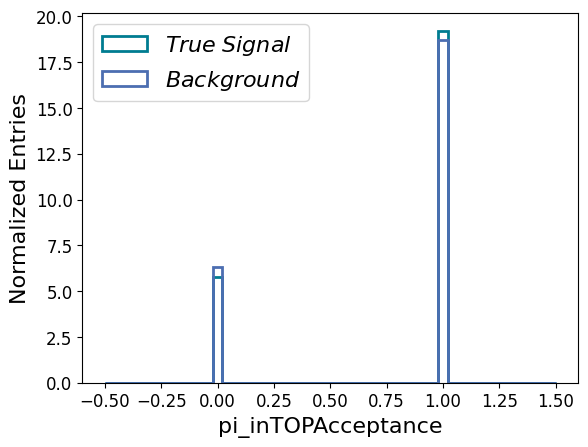

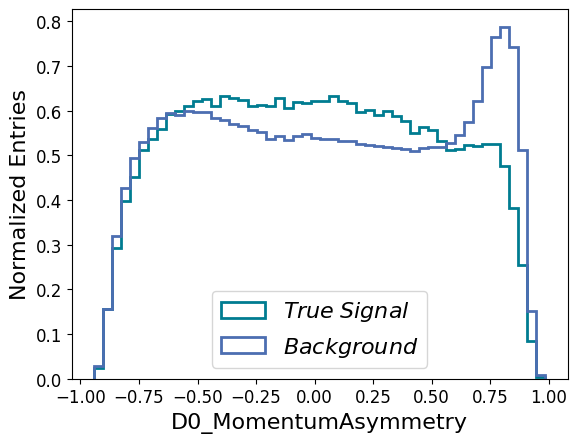

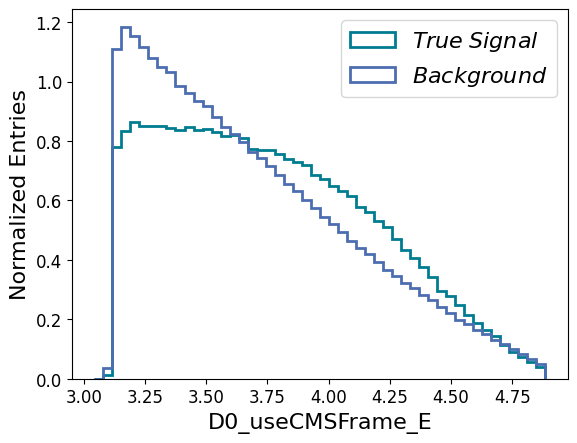

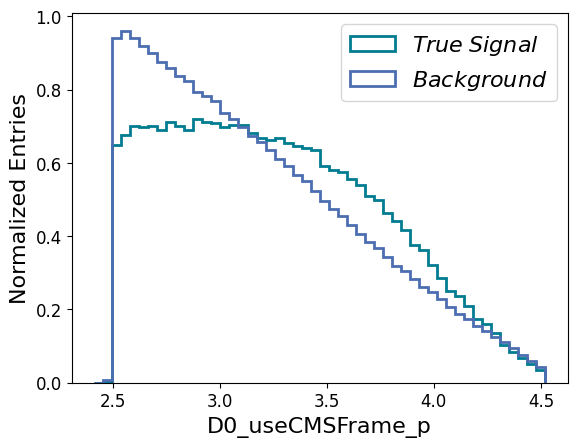

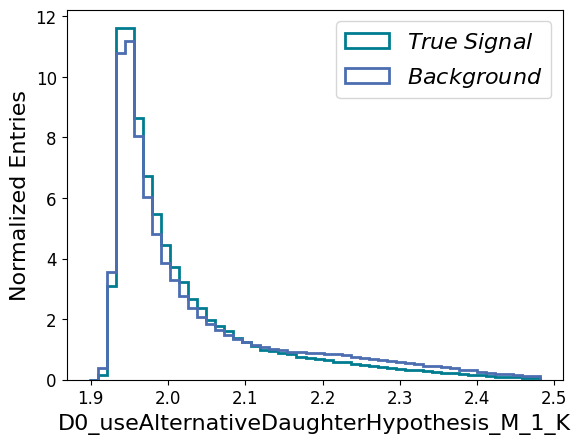

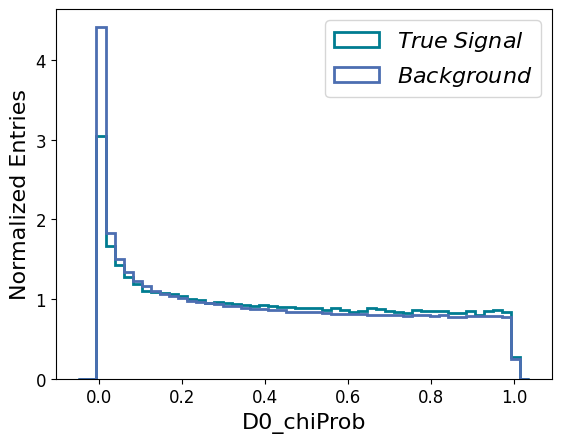

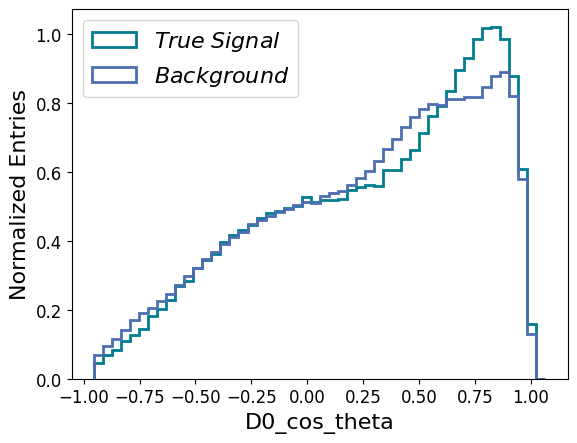

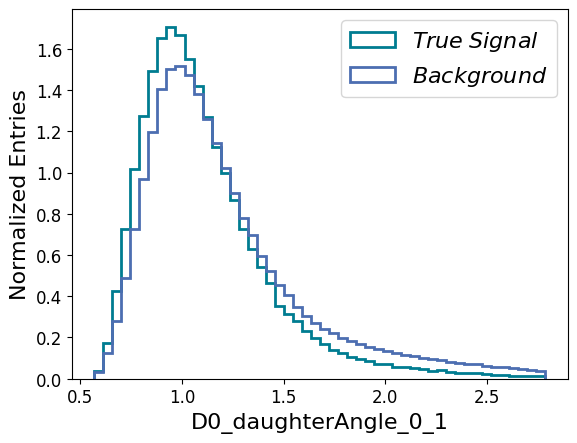

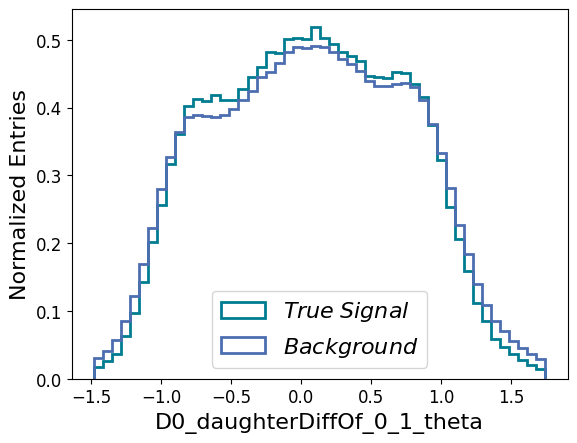

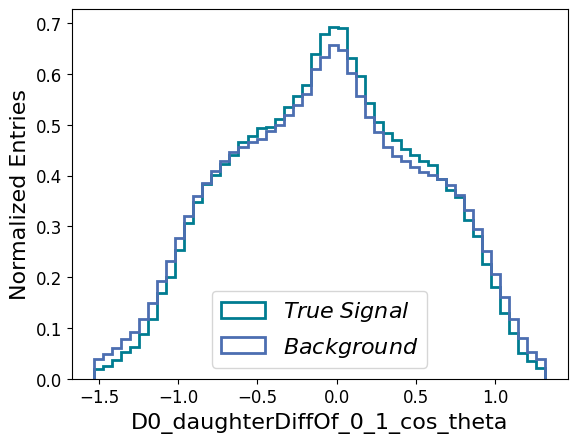

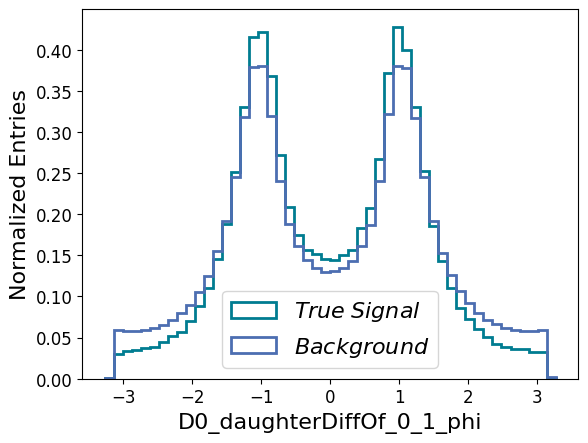

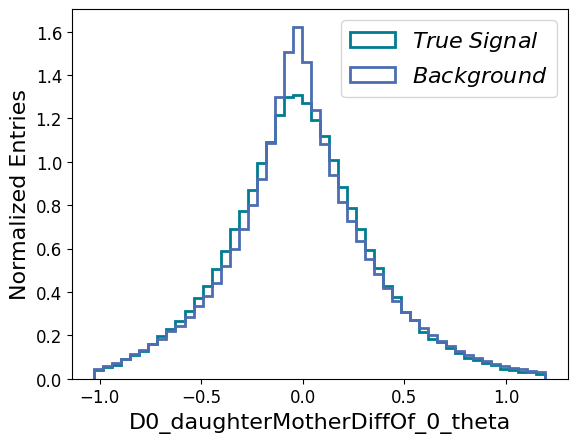

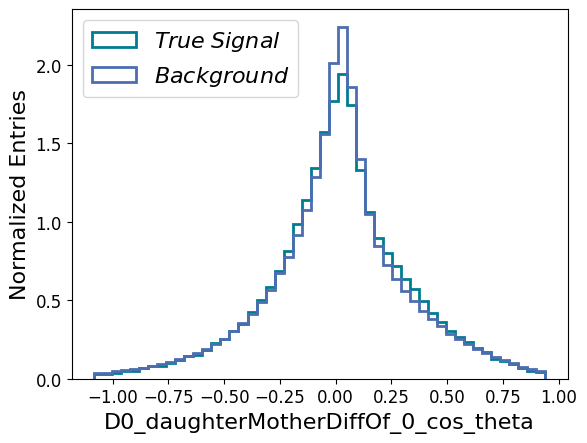

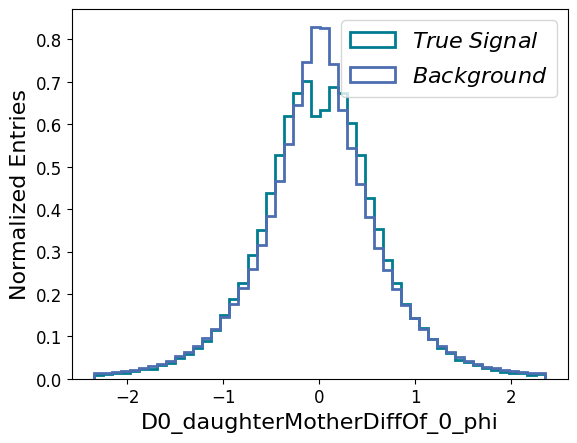

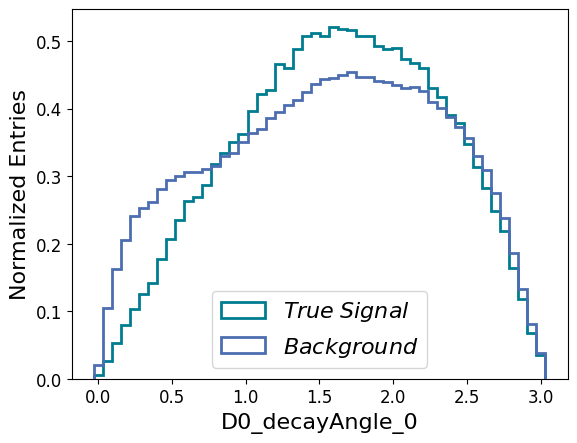

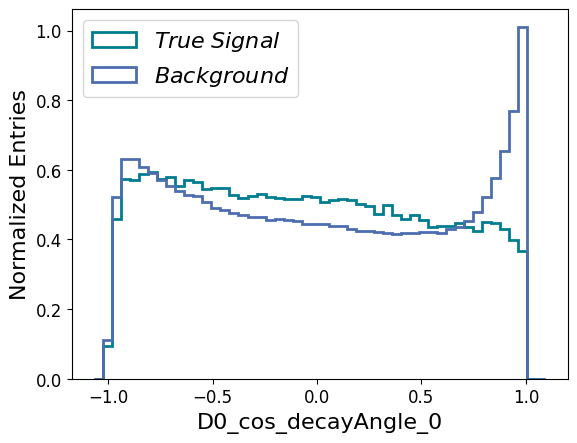

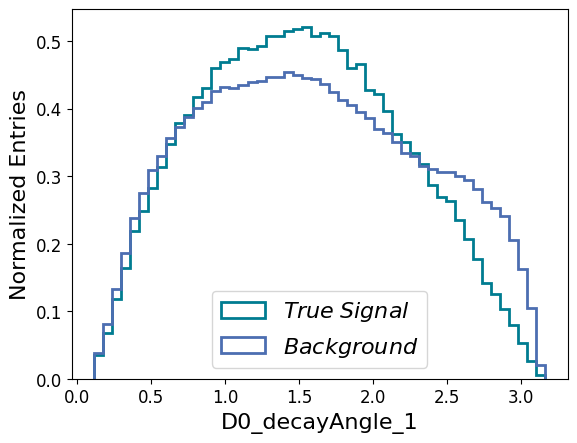

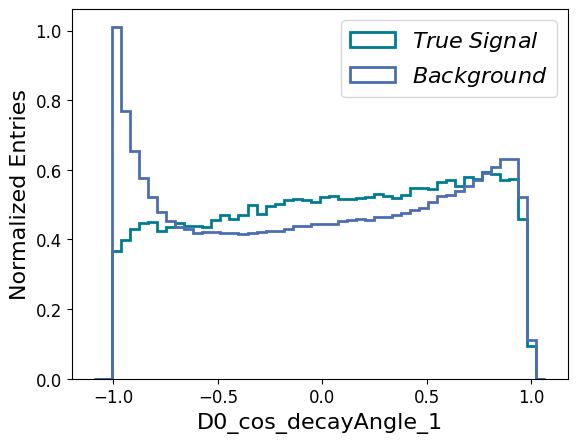

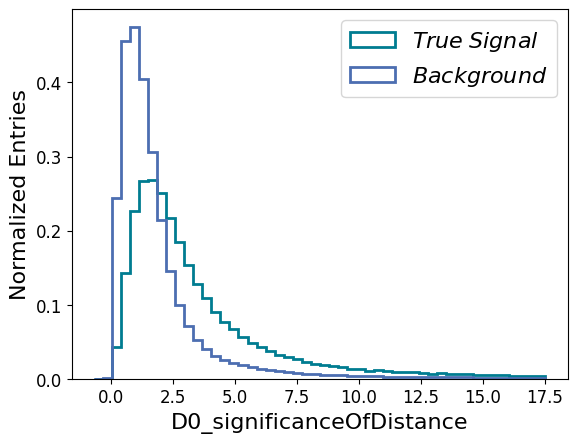

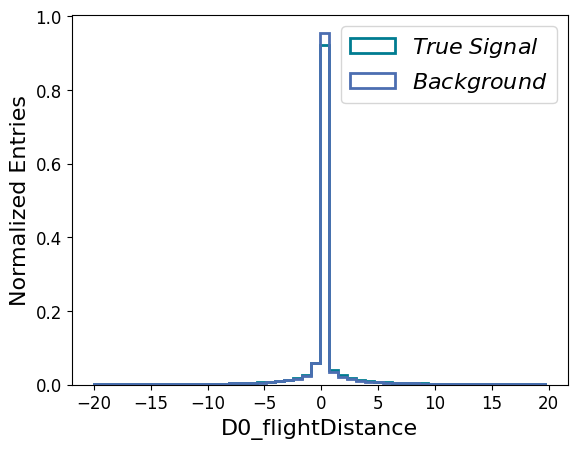

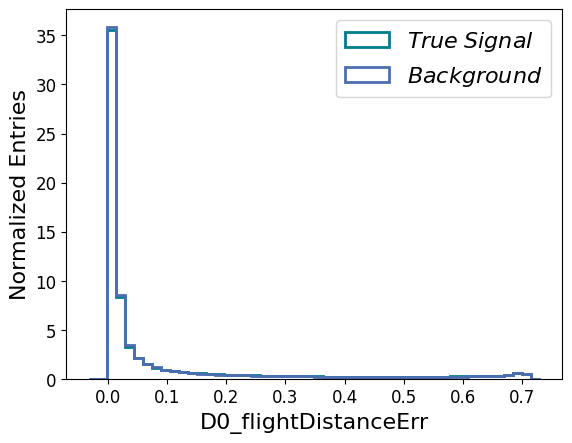

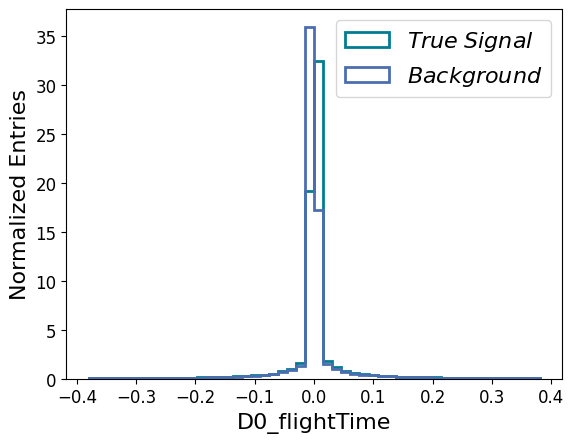

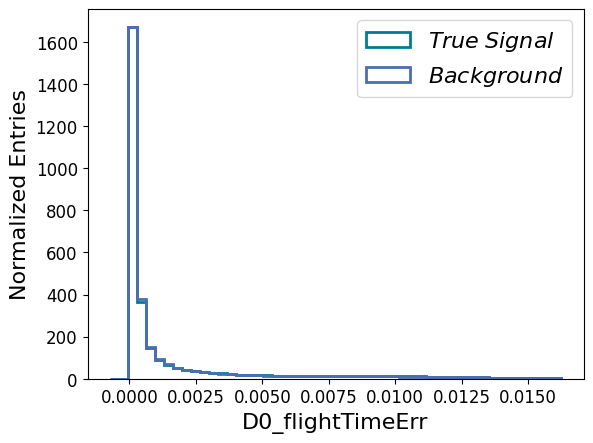

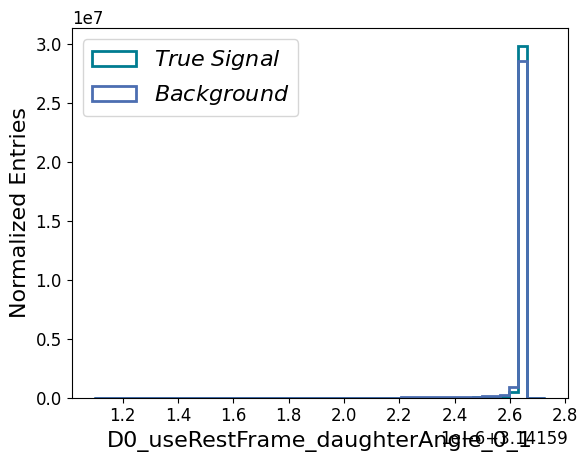

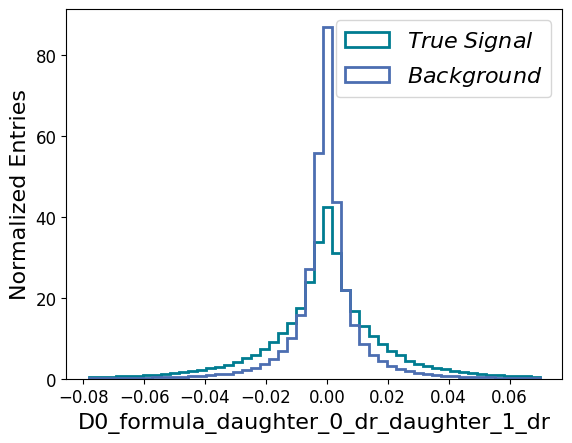

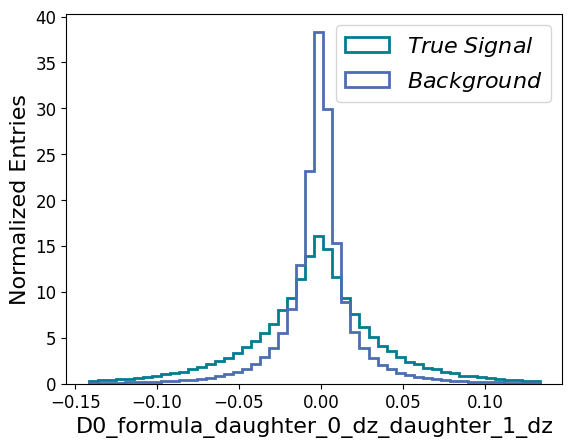

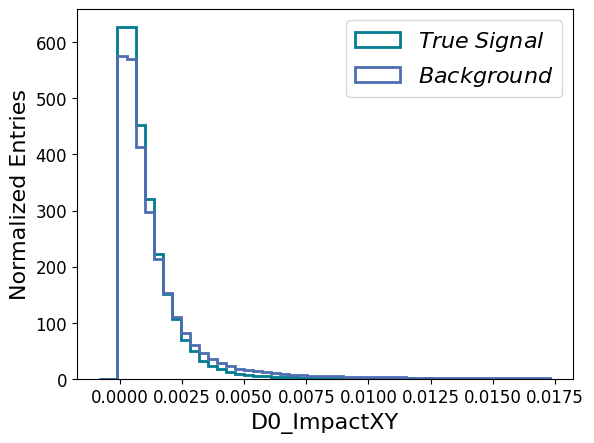

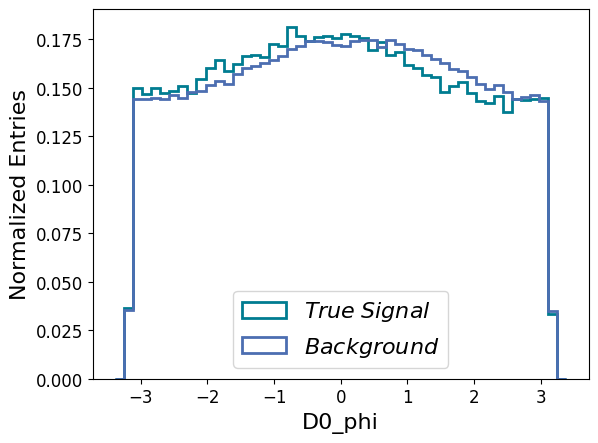

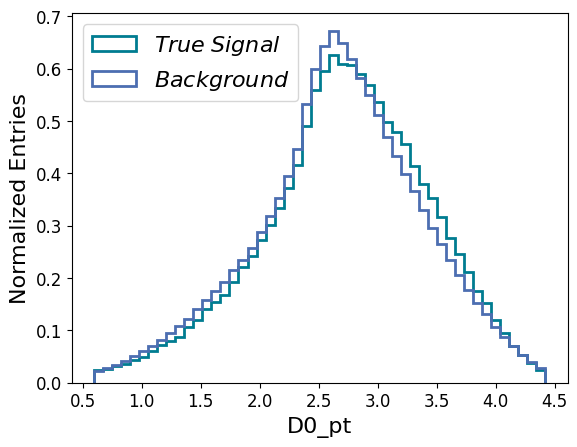

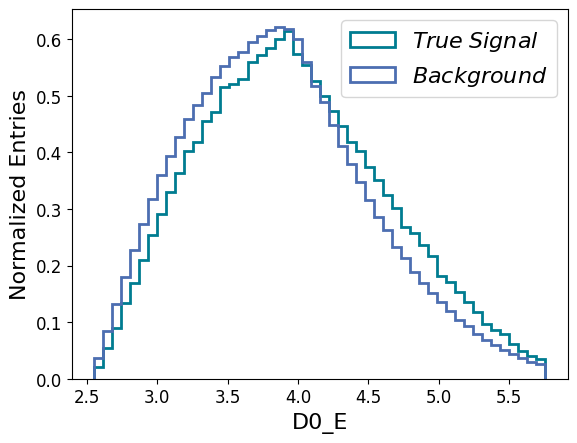

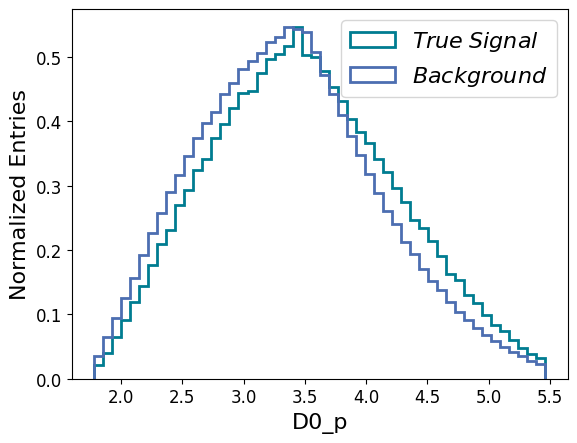

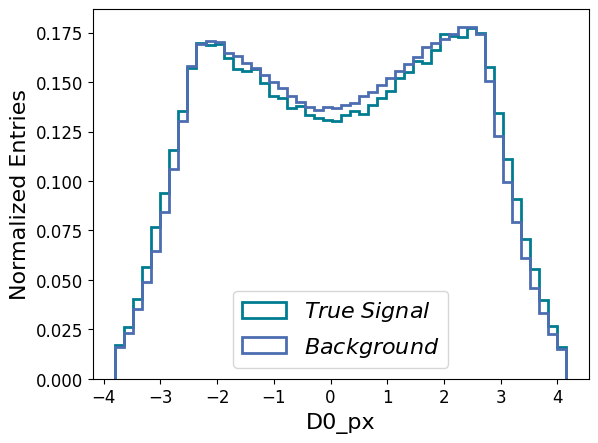

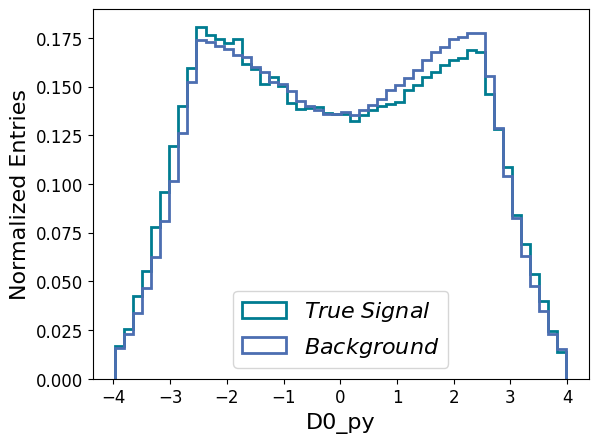

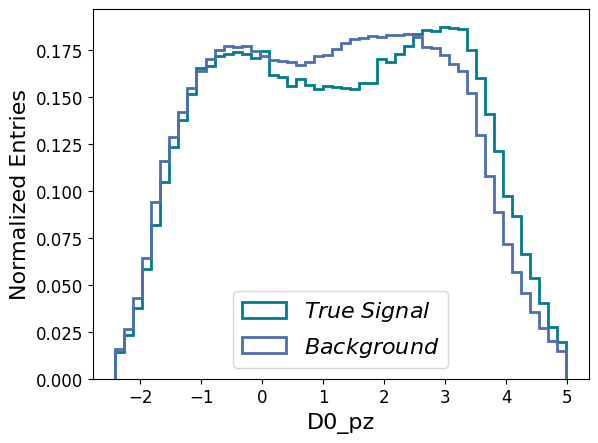

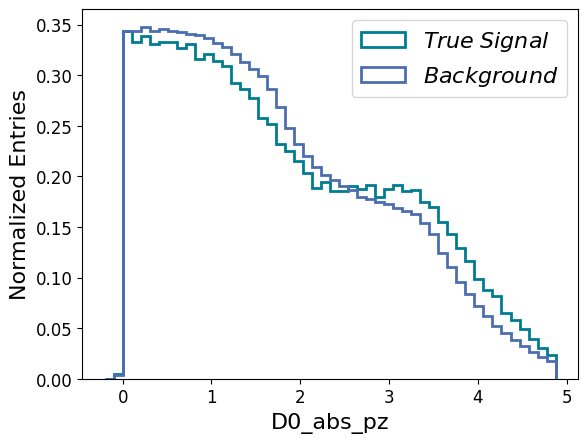

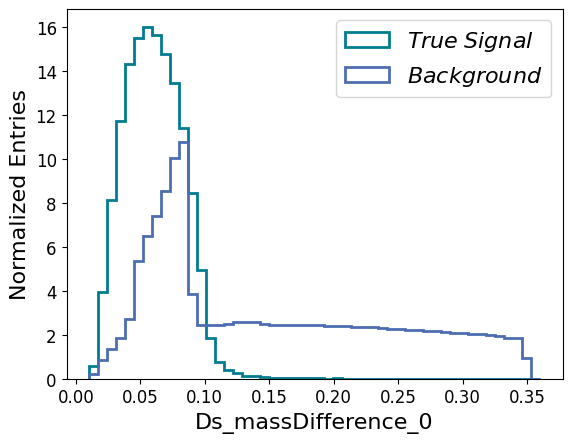

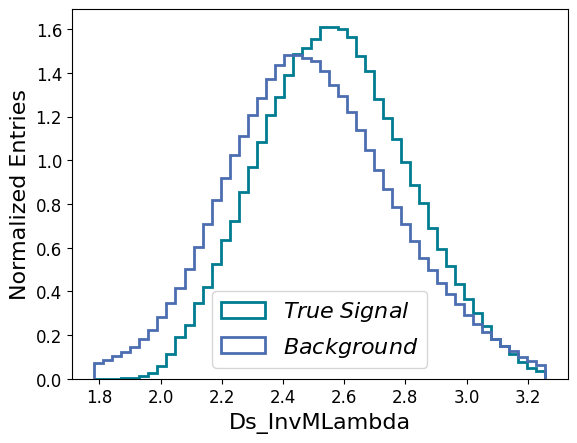

/home/belle2/amubarak/env/lib64/python3.9/site-packages/matplotlib/axes/_axes.py:6986: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bins = np.histogram_bin_edges(
/home/belle2/amubarak/env/lib64/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


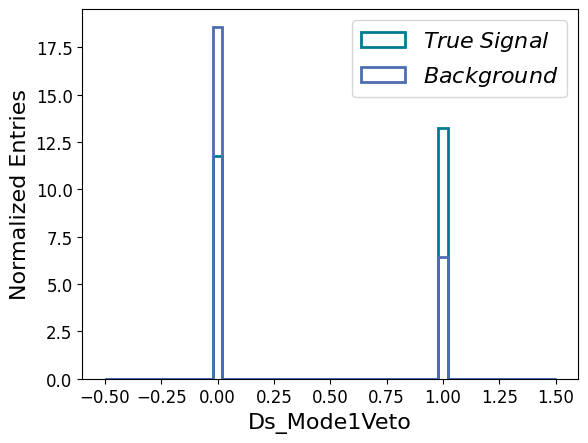

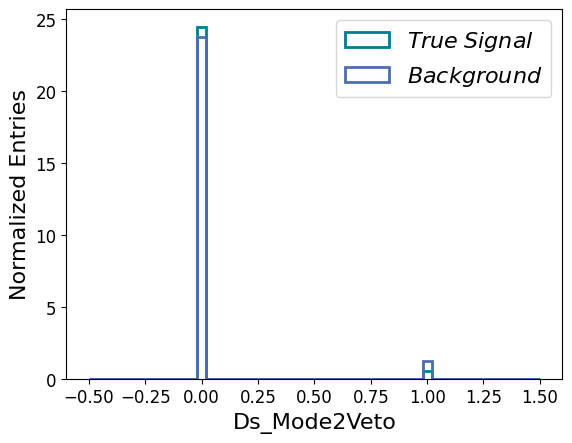

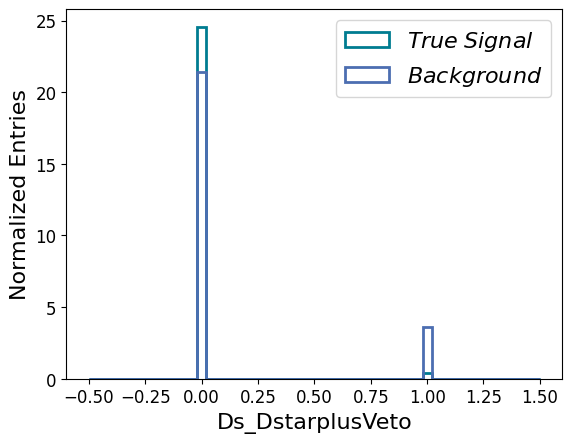

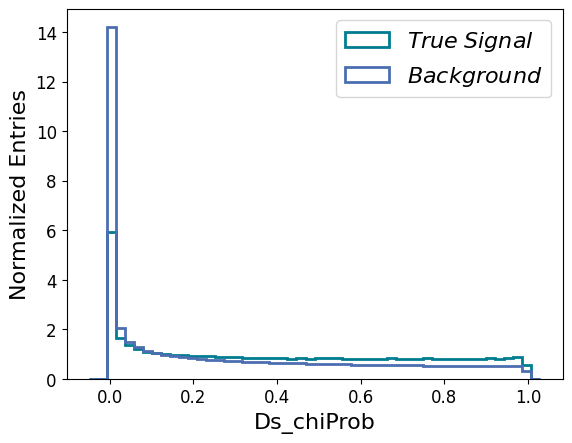

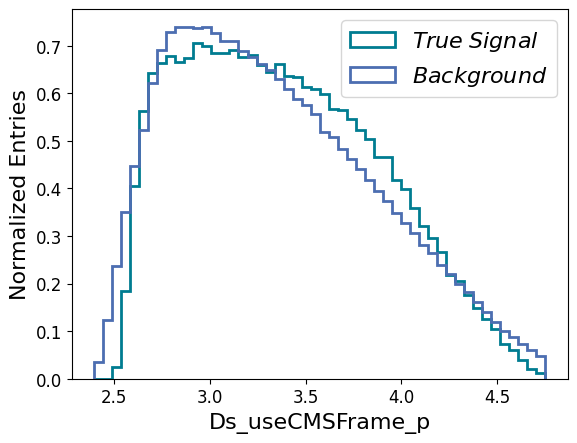

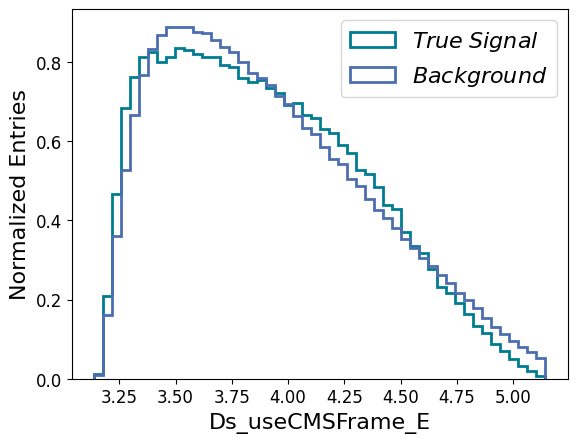

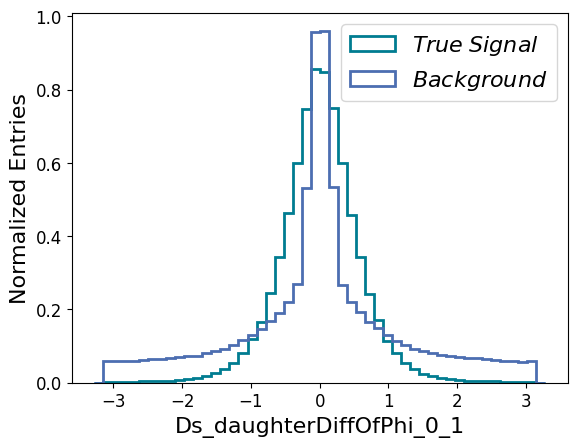

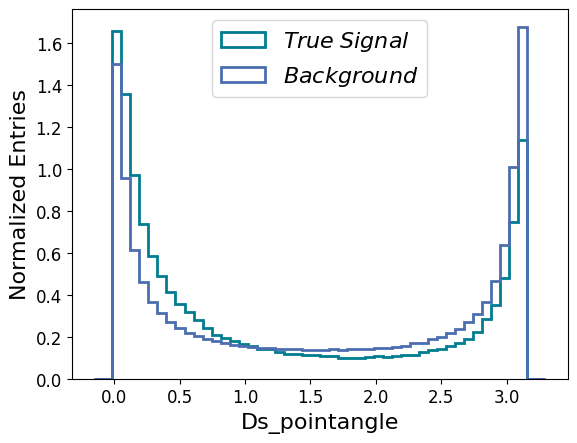

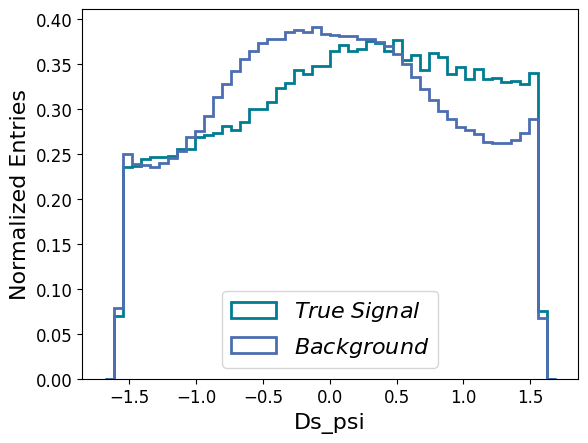

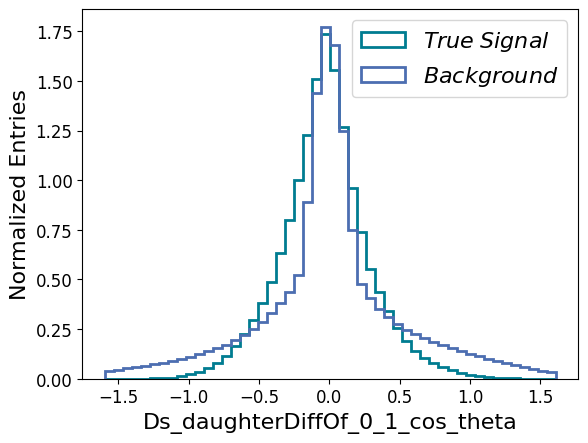

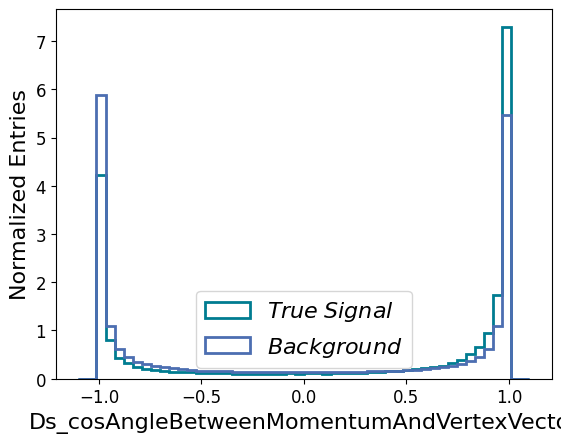

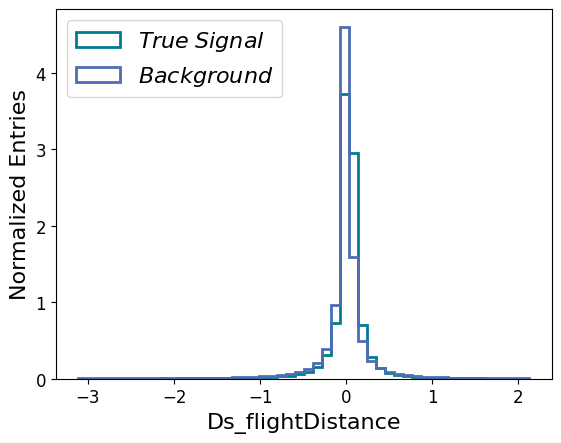

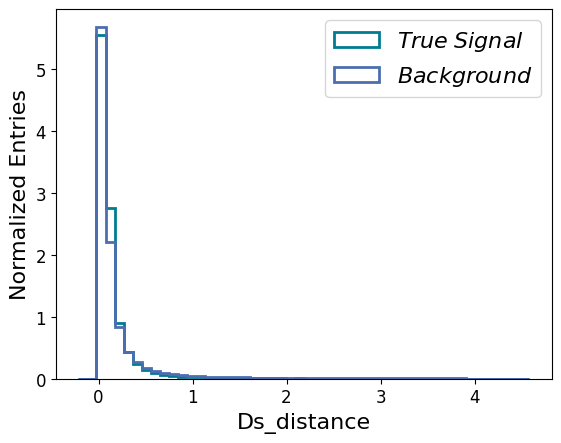

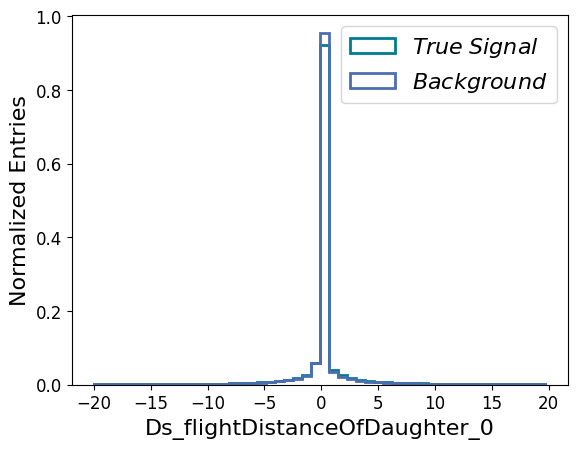

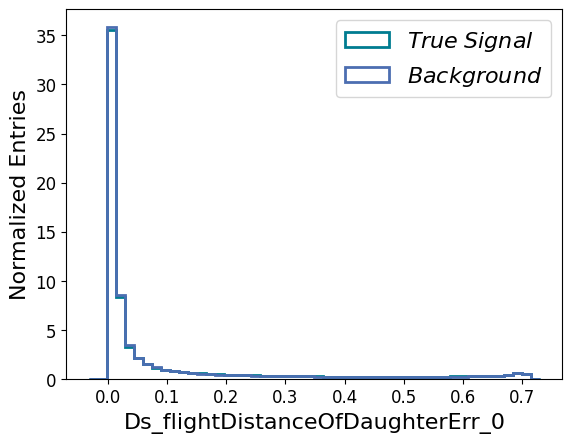

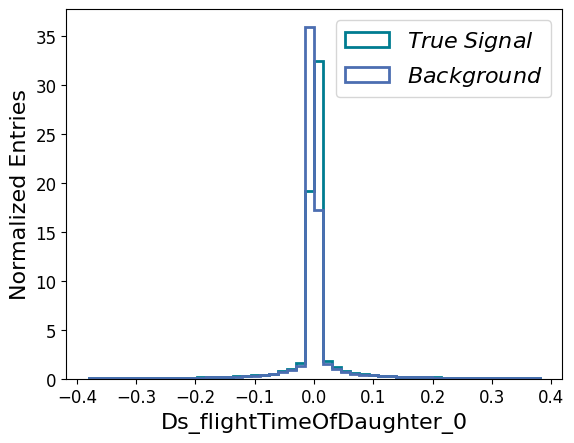

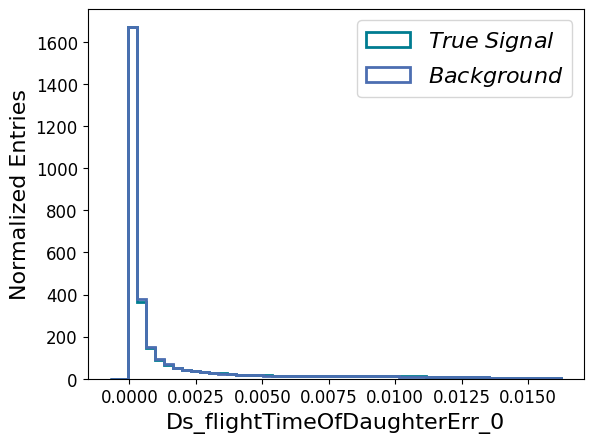

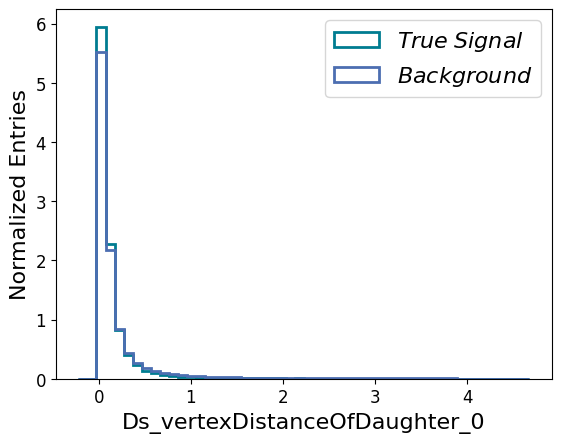

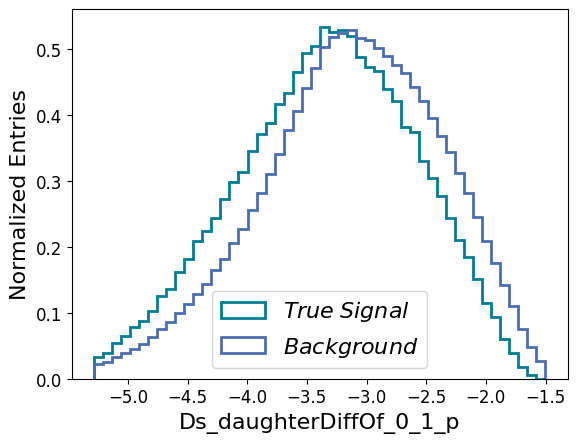

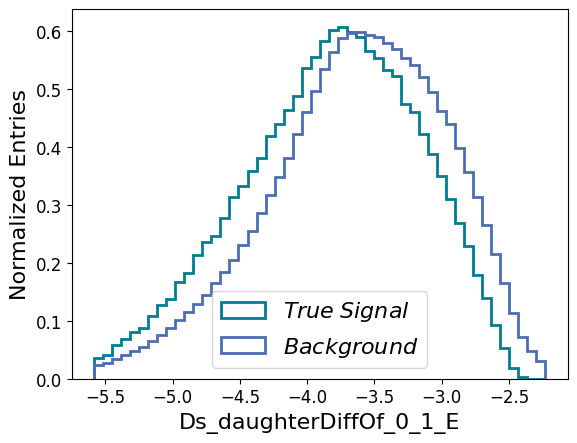

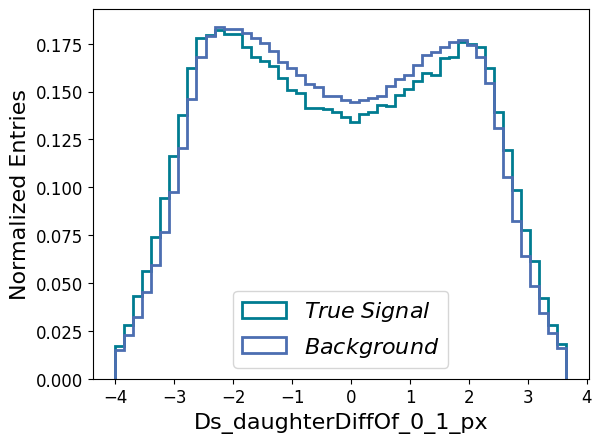

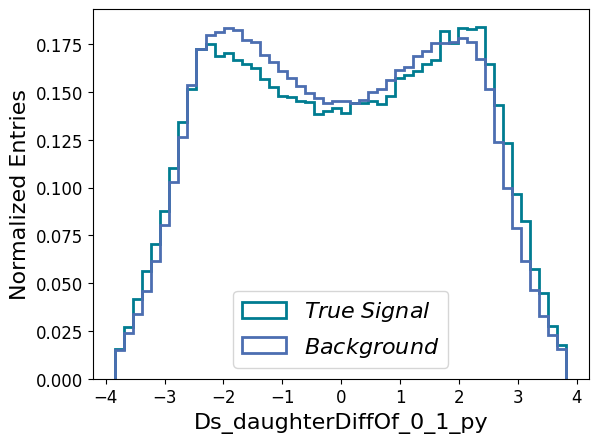

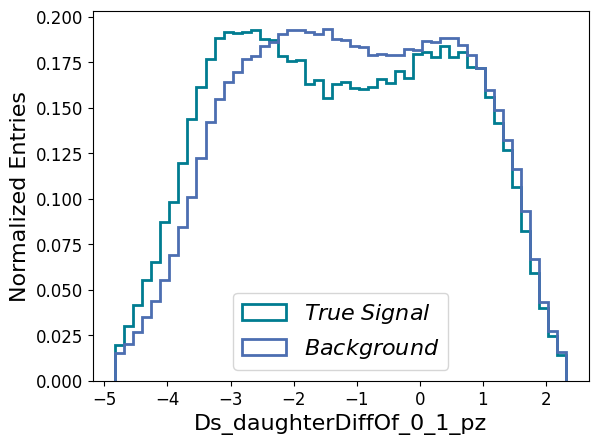

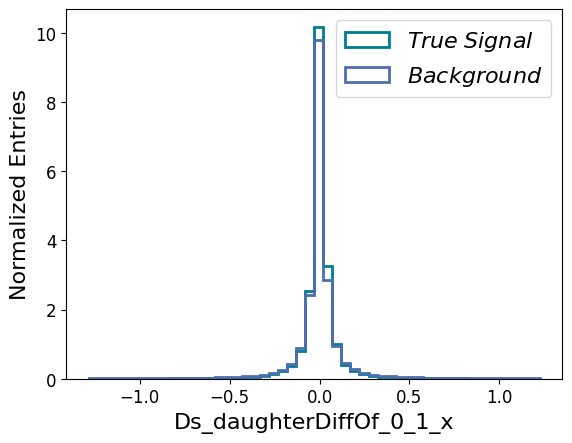

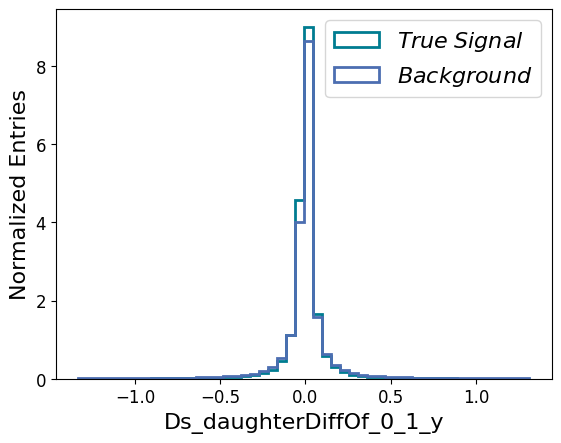

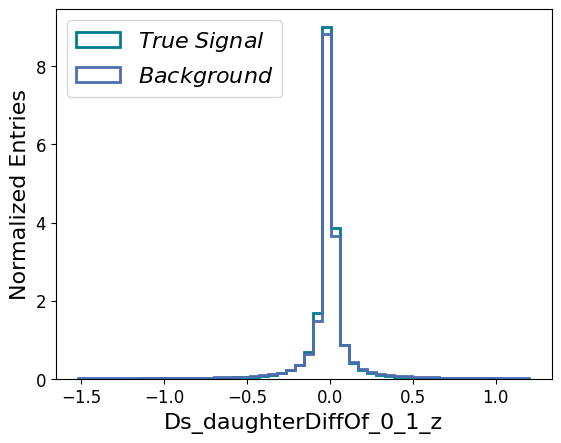

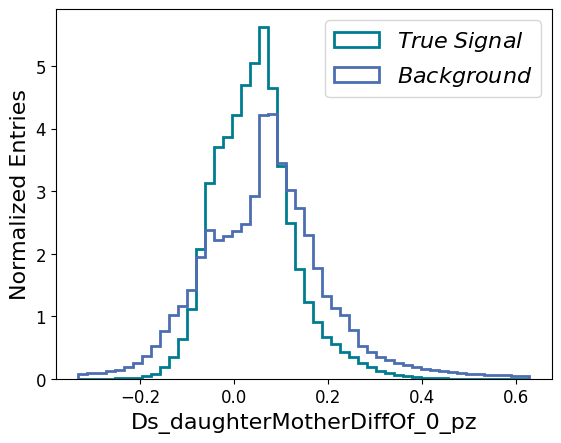

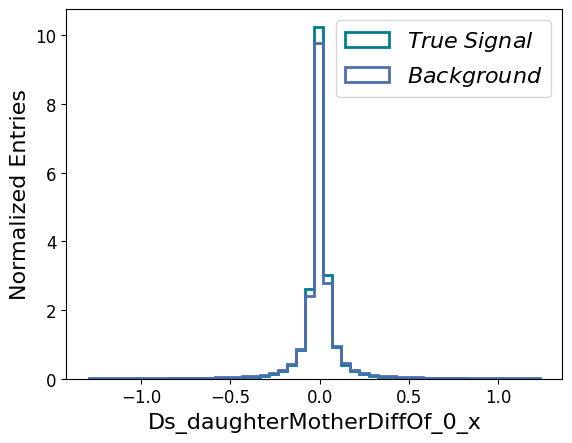

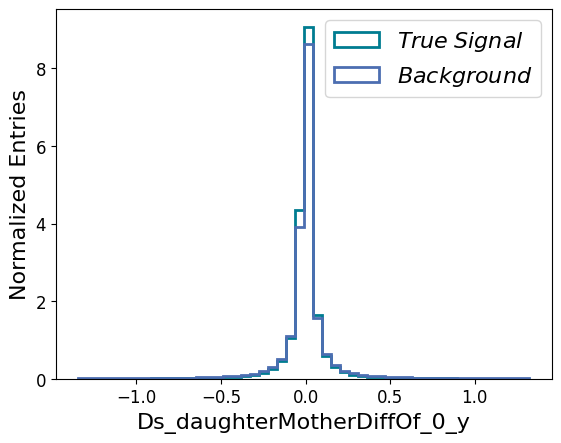

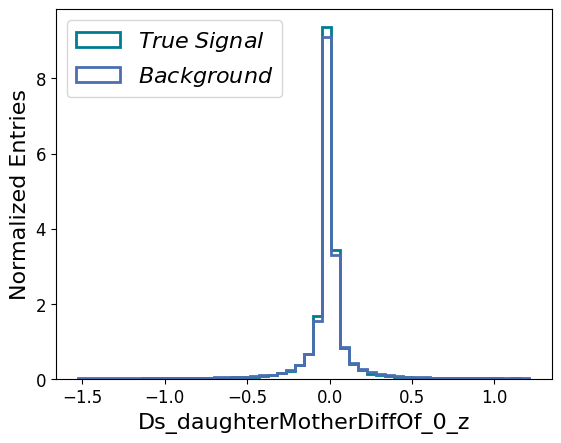

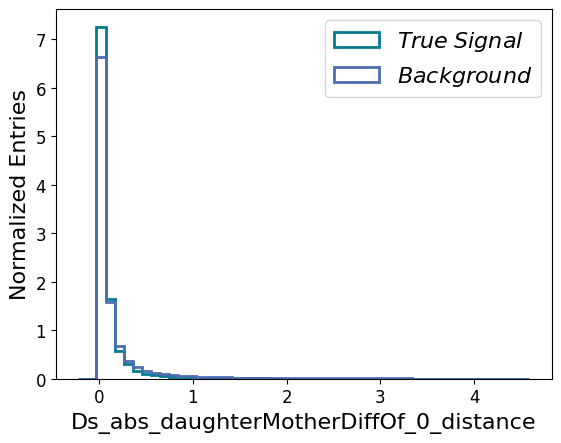

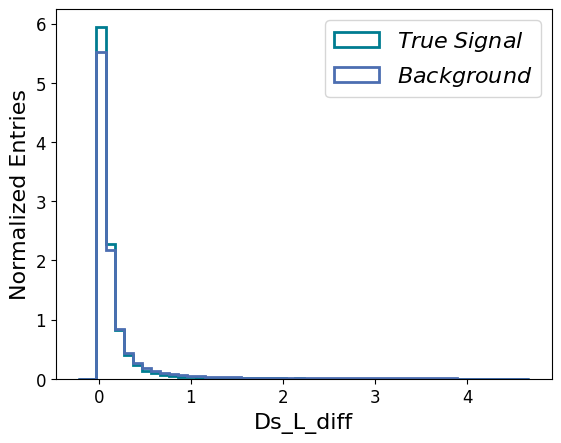

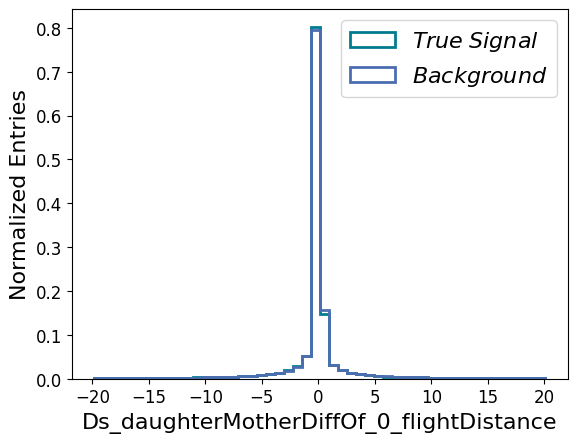

/home/belle2/amubarak/env/lib64/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


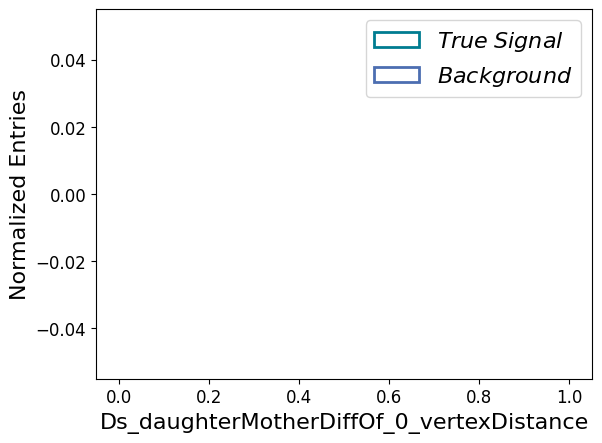

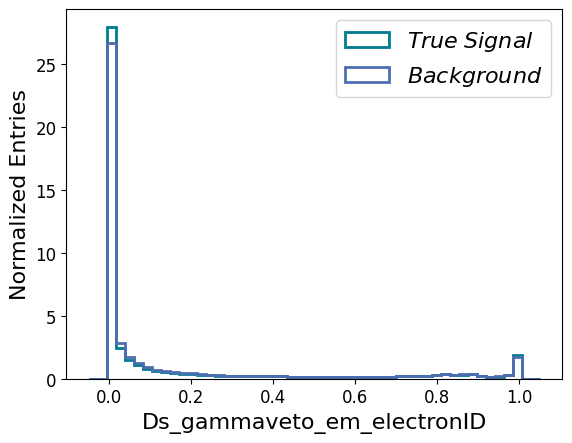

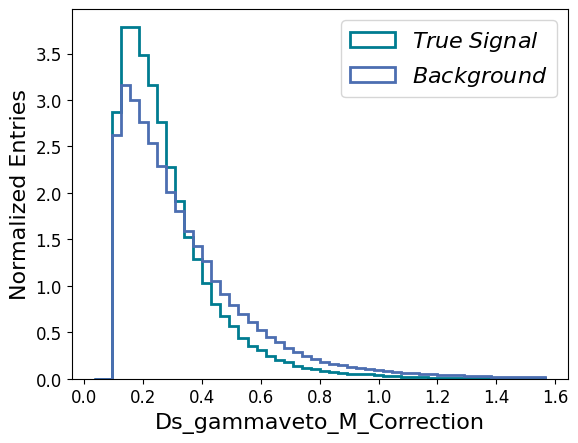

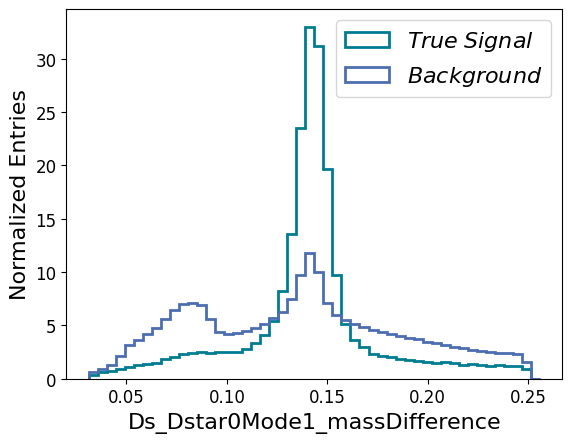

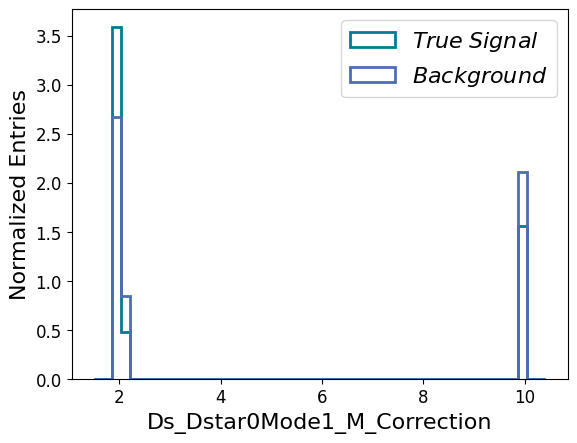

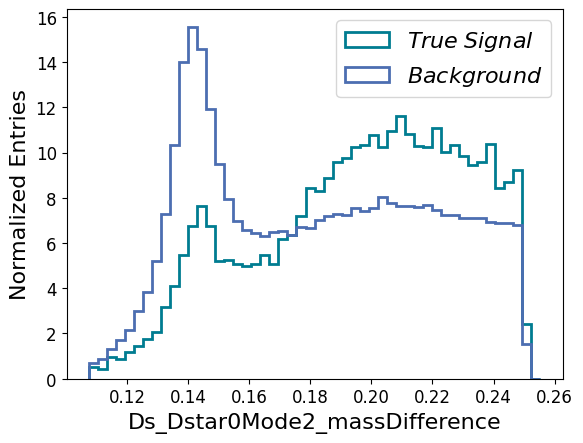

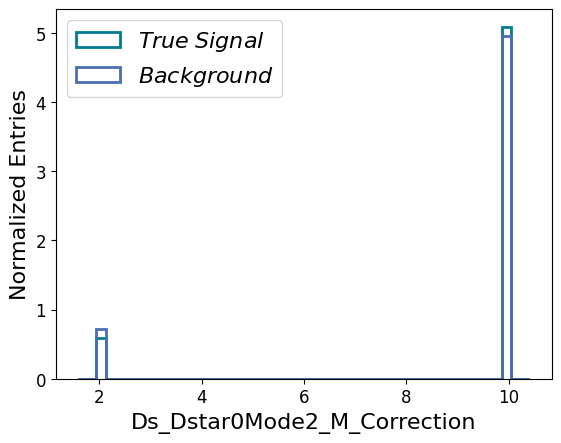

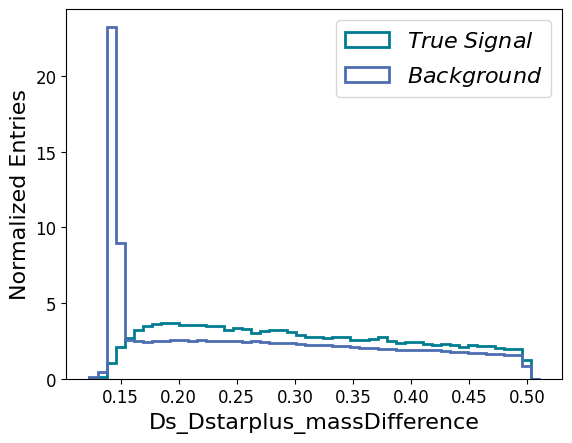

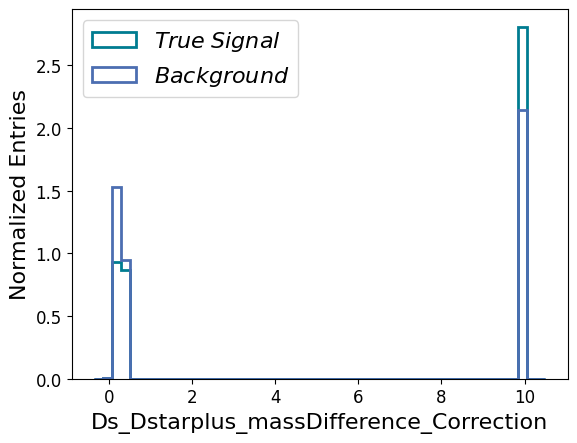

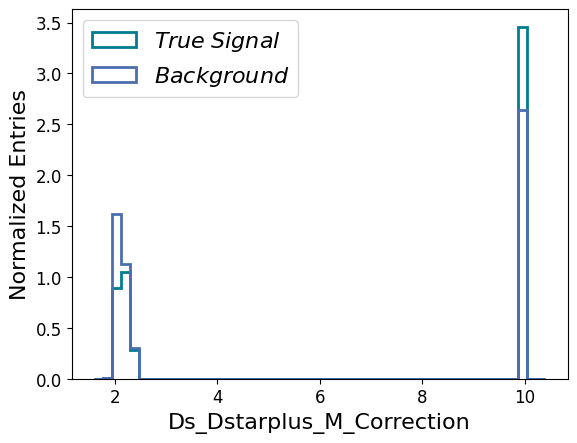

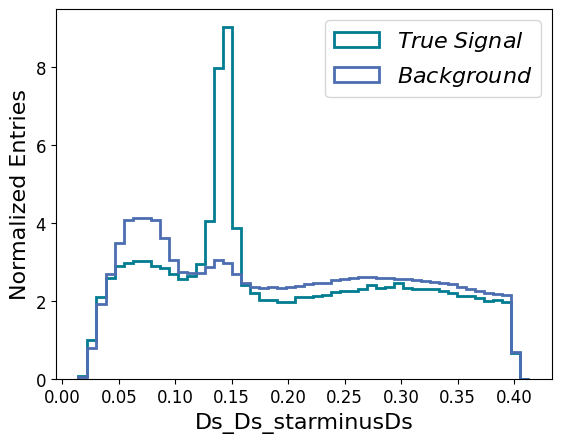

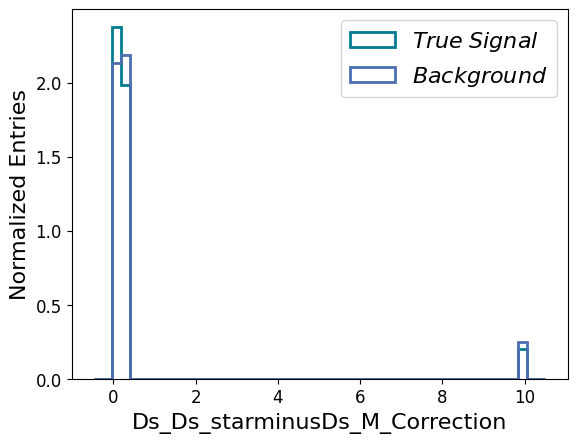

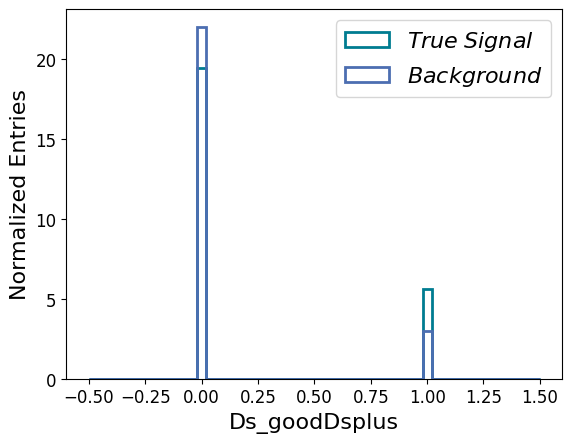

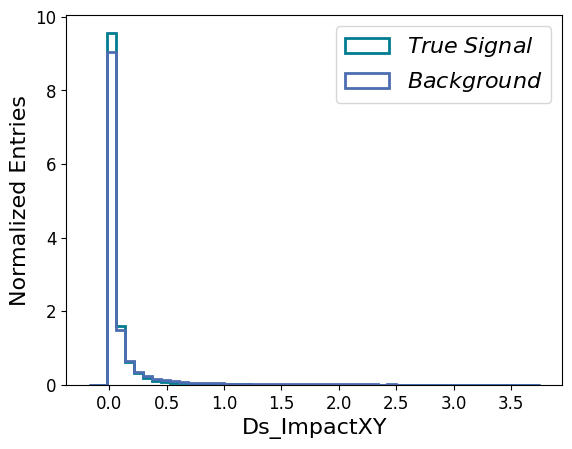

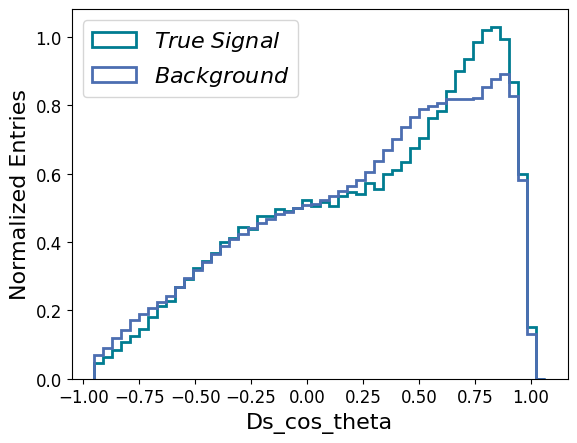

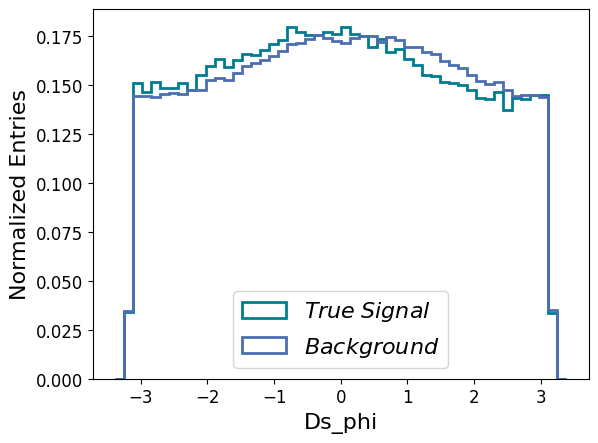

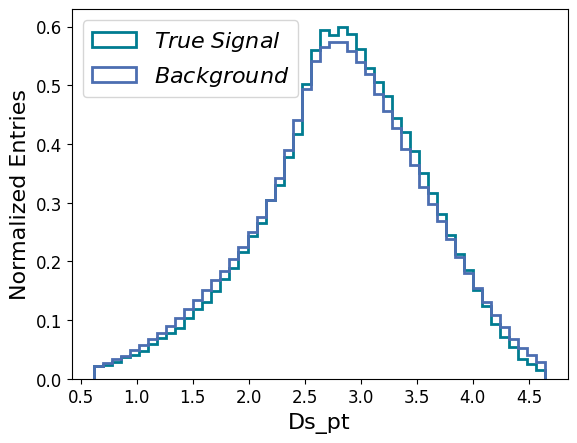

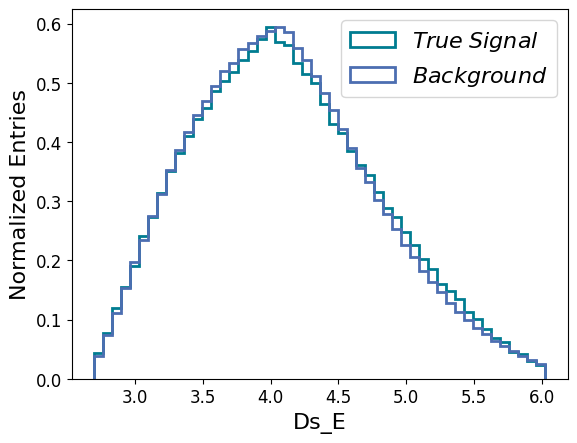

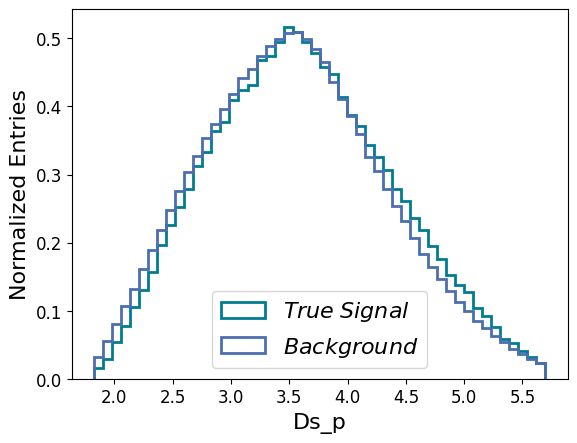

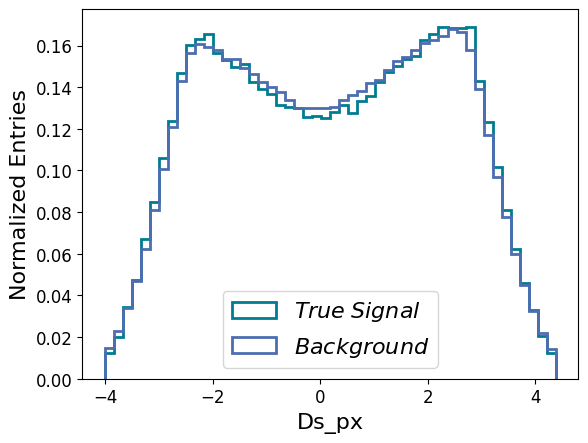

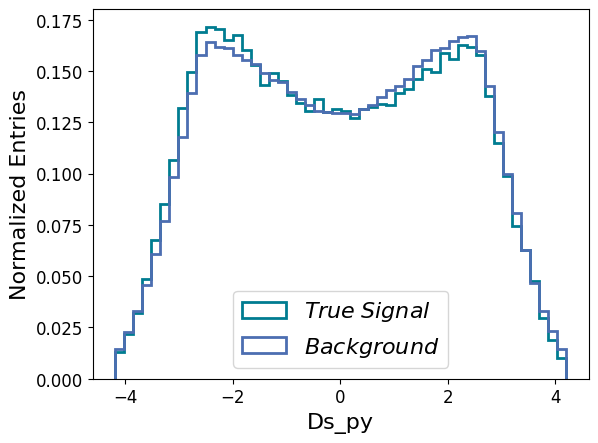

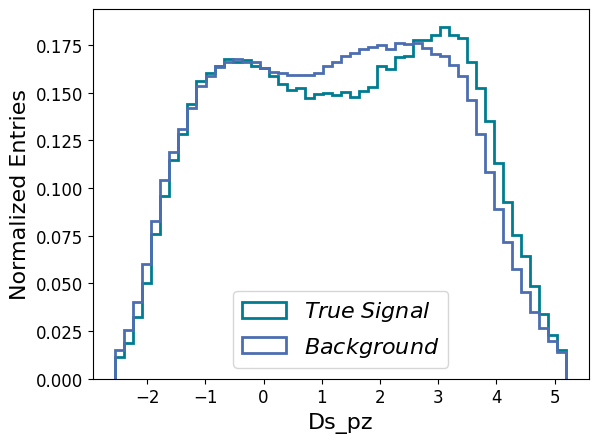

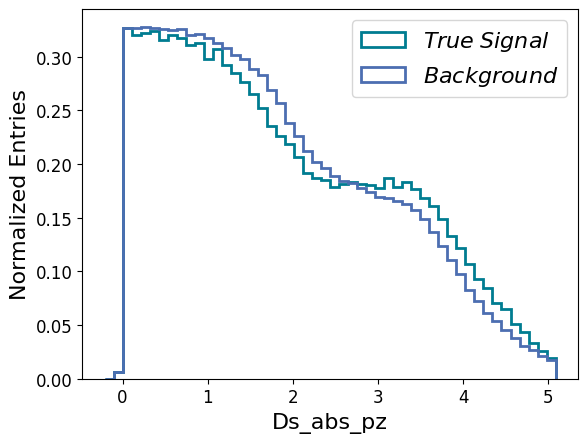

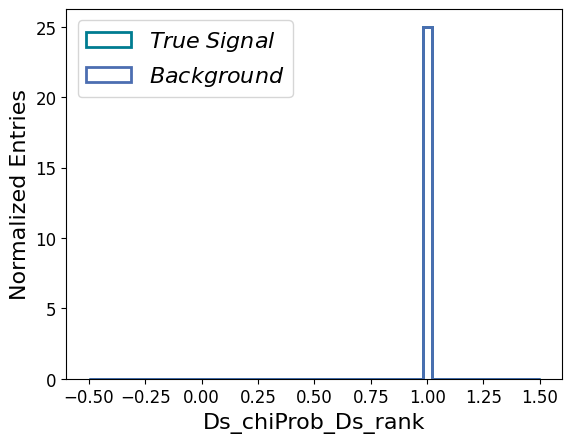

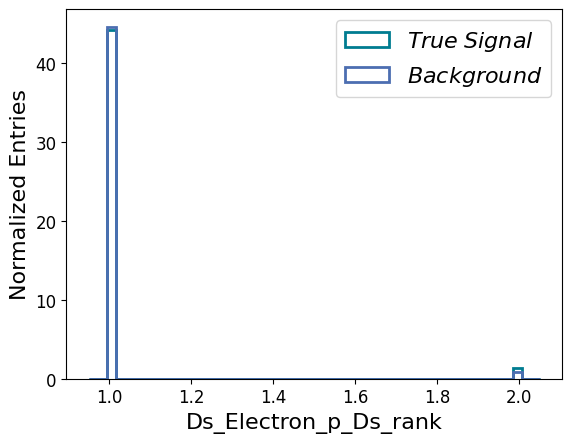

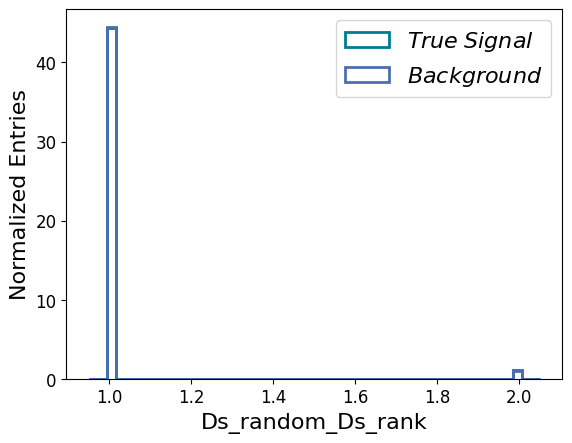

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Settings ===
Stacked = False
Density = True
Bins = 50
factor = 0.25  # signal weight scale

# === Color settings ===
signal_color = "#007C91"  # Teal-blue
bkg_colors = [
    "#2E2E2E",  # Comb. (dark gray-black)
    "#D62728",  # NaN (dark red)
    "#4C6EB1",  # D*0 (muted blue)
    "#006400",  # D*+ → D0π+ (deep green)
]

# === Prompt user to select comparison mode ===
compare_mode = int(input(
    "Choose comparison mode:\n"
    "[1] Signal vs Background Categories\n"
    "[2] Signal vs All Background\n> "
).strip())

# === Load variable list from file ===
with open("/home/belle2/amubarak/Ds2D0enue_Analysis/03-Grid/SignalVsBkg_VariableList.txt", "r") as f:
    features = [line.strip() for line in f if line.strip()]

# # === Load variable list from DataFrames ===
# all_columns = list(DataFrames["All"].columns)
# features = [col for col in all_columns if DataFrames["All"][col].dtype in [np.float64, np.float32, np.int64]]

# === Clean range function ===
def get_clean_range(series, lower=1, upper=99, expand_ratio=0.05):
    """Compute a robust plotting range by trimming outliers. Handles booleans."""
    clean = series.replace([np.inf, -np.inf], np.nan).dropna()

    if clean.empty:
        return (0, 1)

    # If boolean or only 0/1 values
    if pd.api.types.is_bool_dtype(clean) or clean.dropna().isin([0, 1]).all():
        return (-0.5, 1.5)

    # Else treat as numeric
    low = np.percentile(clean, lower)
    high = np.percentile(clean, upper)
    margin = (high - low) * expand_ratio
    return (low - margin, high + margin)

# === Main plotting loop ===
for i in features:
    # === Real signal selection
    signal_df = DataFrames["Signal"]
    signal_df = signal_df[signal_df["Ds_ifNANgiveX_isSignal_5"] == 1]
    signal_values = signal_df[i]
    signal_weights = factor * np.ones_like(signal_values)

    # === Histogram range
    Range = get_clean_range(DataFrames["All"][i], upper=99)

    if compare_mode == 1:
        # === Signal vs individual background types
        labels = [
            r'$Comb.$',
            r'$NaN$',
            r'$D^{*0}$',
            r'$D^{*+} \rightarrow D^{0} \pi^{+}$',
        ]

        df_all = DataFrames["All"]
        data = [
            df_all[(~df_all["Ds_mcPDG"].isna()) & (abs(df_all["Ds_mcPDG"]) != 413) & (abs(df_all["Ds_mcPDG"]) != 423)][i],
            df_all[df_all["Ds_mcPDG"].isna()][i],
            df_all[abs(df_all["Ds_mcPDG"]) == 423][i],
            df_all[abs(df_all["Ds_mcPDG"]) == 413][i],
        ]

        # Plot signal (solid line)
        plt.hist(signal_values, label="Signal", histtype='step',
                 density=Density, bins=Bins, range=Range,
                 weights=signal_weights, color=signal_color,
                 linewidth=2)

        # Plot background categories
        plt.hist(data, color=bkg_colors, label=labels, density=Density,
                 stacked=Stacked, bins=Bins, histtype='step',
                 linewidth=2, range=Range)

    else:
        # === Signal vs total background
        labels = [r'$Background$', r'$True\;Signal$']
        colors = ["#4C6EB1", "#007C91"]

        data = [
            DataFrames["All"][i],
            signal_values,
        ]

        plt.hist(data, color=colors, label=labels, density=Density,
                 stacked=Stacked, bins=Bins, histtype='step',
                 linewidth=2, range=Range)

    # === Finalize plot
    plt.xlabel(i)
    plt.ylabel("Normalized Entries" if Density else "Entries")
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Settings ===
Stacked = False
Density = True
Bins = 50
factor = 0.25

signal_color = "#007C91"
bkg_colors = ["#2E2E2E", "#D62728", "#4C6EB1", "#006400"]

# === Prompt user to select comparison mode ===
compare_mode = int(input(
    "Choose comparison mode:\n"
    "[1] Signal vs Background Categories\n"
    "[2] Signal vs All Background\n> "
).strip())

# === Inject derived variables ===
for key in DataFrames:
    df = DataFrames[key].copy()

    df["log_e_p"] = np.log(df["e_p"].replace(0, np.nan))
    df["e_abs_z0"] = df["e_z0"].abs()
    df["e_abs_d0"] = df["e_d0"].abs()
    df["pe_ratio"] = df["D0_p"] / df["e_p"].replace(0, np.nan)

    # Missing mass squared
    E_beam = 5.29
    E_D0 = np.sqrt(df["D0_p"]**2 + 1.864**2)
    E_e = np.sqrt(df["e_p"]**2 + 0.000511**2)
    p_ex = df["e_p"] * np.sqrt(1 - df["e_cos_theta"]**2) * np.cos(df["e_phi"])
    p_ey = df["e_p"] * np.sqrt(1 - df["e_cos_theta"]**2) * np.sin(df["e_phi"])
    p_ez = df["e_p"] * df["e_cos_theta"]
    p_tot_x = df["D0_px"] + p_ex
    p_tot_y = df["D0_py"] + p_ey
    p_tot_z = df["D0_pz"] + p_ez
    p_tot_sq = p_tot_x**2 + p_tot_y**2 + p_tot_z**2
    E_tot = E_D0 + E_e
    df["missing_mass_squared"] = (E_beam - E_tot)**2 - p_tot_sq

    # chiProb diff if available
    if "Ds_chiProb" in df.columns and "D0_chiProb" in df.columns:
        df["chiProb_diff"] = df["Ds_chiProb"] - df["D0_chiProb"]

    DataFrames[key] = df

# === Variables from physics-motivated research
features = [
    "log_e_p",
    "e_p", "e_pz", "e_abs_pz",
    "e_ImpactXY", "e_z0", "e_abs_z0", "e_d0", "e_abs_d0",
    "D0_significanceOfDistance", "D0_useCMSFrame_p",
    "Ds_flightDistance", "Ds_distance",
    "Ds_cosAngleBetweenMomentumAndVertexVector",
    "Ds_vertexDistanceOfDaughter_0",
    "missing_mass_squared",
    "pe_ratio",
    "Ds_chiProb",
    "e_electronID", "e_pionID", "e_binaryPID_11_211",
    "e_firstCDCLayer", "e_firstSVDLayer", "e_firstPXDLayer",
    "e_nPXDHits", "e_nSVDHits", "e_nCDCHits", "e_nVXDHits",
    "e_inARICHAcceptance", "e_inCDCAcceptance",
]

# Add chiProb_diff if available
if "chiProb_diff" in DataFrames["All"].columns:
    features.append("chiProb_diff")

# === Clean range function
def get_clean_range(series, lower=1, upper=99, expand_ratio=0.05):
    clean = series.replace([np.inf, -np.inf], np.nan).dropna()
    if clean.empty:
        return (0, 1)
    if pd.api.types.is_bool_dtype(clean) or clean.dropna().isin([0, 1]).all():
        return (-0.5, 1.5)
    low = np.percentile(clean, lower)
    high = np.percentile(clean, upper)
    margin = (high - low) * expand_ratio
    return (low - margin, high + margin)

# === Main plotting loop
for i in features:
    signal_df = DataFrames["Signal"]
    signal_df = signal_df[signal_df["Ds_ifNANgiveX_isSignal_5"] == 1]
    signal_values = signal_df[i].replace([np.inf, -np.inf], np.nan).dropna()
    signal_weights = factor * np.ones_like(signal_values)

    Range = get_clean_range(DataFrames["All"][i], upper=99)

    if compare_mode == 1:
        labels = [
            r'$Comb.$',
            r'$NaN$',
            r'$D^{*0}$',
            r'$D^{*+} \rightarrow D^{0} \pi^{+}$',
        ]
        df_all = DataFrames["All"]
        data = [
            df_all[(~df_all["Ds_mcPDG"].isna()) & (abs(df_all["Ds_mcPDG"]) != 413) & (abs(df_all["Ds_mcPDG"]) != 423)][i],
            df_all[df_all["Ds_mcPDG"].isna()][i],
            df_all[abs(df_all["Ds_mcPDG"]) == 423][i],
            df_all[abs(df_all["Ds_mcPDG"]) == 413][i],
        ]

        plt.hist(signal_values, label="Signal", histtype='step',
                 density=Density, bins=Bins, range=Range,
                 weights=signal_weights, color=signal_color, linewidth=2)

        plt.hist(data, color=bkg_colors, label=labels, density=Density,
                 stacked=Stacked, bins=Bins, histtype='step',
                 linewidth=2, range=Range)
    else:
        labels = [r'$Background$', r'$True\;Signal$']
        colors = ["#4C6EB1", "#007C91"]
        data = [DataFrames["All"][i], signal_values]

        plt.hist(data, color=colors, label=labels, density=Density,
                 stacked=Stacked, bins=Bins, histtype='step',
                 linewidth=2, range=Range)

    plt.xlabel(i)
    plt.ylabel("Normalized Entries" if Density else "Entries")
    plt.legend()
    plt.show()


# 2-D Histogram

In [ ]:
# # name_x = 'Ds_massDifference_0'
# name_x = 'Ds_dM_D0pi'
# name_y = 'Ds_Angle_D0e'
# Sample = "ccbar"

# h = make_2d_hist([DataFrames[Sample][name_x], DataFrames[Sample][name_y]], bins=[50, 50], range=[[0.135,0.4],[0,3.14]])

# (
#     fig,
#     ax_2d,
#     ax_x_projection,
#     ax_y_projection,
#     ax_colorbar,
# ) = plot_2d_hist_with_projections(
#     h,
#     xlabel=r'$\Delta m\;[GeV/c^{2}]$',
#     ylabel=r'$\theta(D^{0}e^{+})\;[rad]$',
#     ylabel_x_projection="Entries",
#     xlabel_y_projection="Entries",
#     offset_x_labels=True,
#     colorbar_kwargs={"label": "Entries"},
#     figsize=(6,6)
# )